# Project: Bankruptcy Prevention

**Bankruptcy prevention refers to the set of actions, strategies, and financial management practices undertaken by individuals, businesses, or organizations to avoid or mitigate the risk of bankruptcy. Bankruptcy is a legal process through which people or other entities who cannot repay debts to creditors may seek relief from some or all of their debts. In most jurisdictions, bankruptcy is imposed by a court order, often initiated by the debtor.**

### Problem Statement:

**This is a classification project, since the variable to predict is binary (bankruptcy or non-bankruptcy). The goal here is to model the probability that a business goes bankrupt from different features.**

**The data file contains 7 features about 250 companies.**

### Attribute information For Bankruptcy Prevention dataset

**The data set includes the following variables:**

1. industrial_risk: 0=low risk, 0.5=medium risk, 1=high risk.
2. management_risk: 0=low risk, 0.5=medium risk, 1=high risk.
3. financial flexibility: 0=low flexibility, 0.5=medium flexibility, 1=high flexibility.
4. credibility: 0=low credibility, 0.5=medium credibility, 1=high credibility.
5. competitiveness: 0=low competitiveness, 0.5=medium competitiveness, 1=high competitiveness.
6. operating_risk: 0=low risk, 0.5=medium risk, 1=high risk.
7. class: bankruptcy, non-bankruptcy (target variable).

### Acceptance Criterion:
- Need to deploy the end results using Flask /Streamlit.etc.

### Metrics for evaluating the model:
1. Confusion Matrix
2. Accuracy Score
3. Classification Report
4. cross-validation score
5. Area Under the ROC Curve (AUC-ROC)

### Import the Libraries

In [1]:
import pandas as pd #For data preprocessing
import numpy as np #For numerical Operations
import matplotlib.pyplot as plt #For Visualization
import seaborn as sns #for statistical Visiualization

from sklearn.model_selection import train_test_split , KFold  # For splitting the Data
from sklearn.preprocessing import LabelEncoder #To encode the labels
from sklearn.preprocessing import StandardScaler, MinMaxScaler #To scale the labels
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score #To check type of error we got
from sklearn.metrics import accuracy_score,recall_score , roc_auc_score #To check accuracy of Model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score 
from sklearn import metrics #To calculate metrics
import sweetviz as sv

import warnings
warnings.filterwarnings('ignore')

### Load the Data Set

In [2]:
# Load Bankruptcy Prevention Dataset
data = pd.read_csv("bankruptcy-prevention.csv", sep = ';')
data.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


It shows that there are six independent variables (industrial_risk, management_risk, financial_flexibility, credibility, competitiveness, operating_risk) and one dependent variable (class).

In [3]:
# Displaying last 5 records
# To see all columns
pd.set_option("display.max.columns", None)
data.tail()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy
249,1.0,0.0,0.5,0.5,1.0,1.0,non-bankruptcy


## Data Understanding 
### Summerize Data

In [4]:
# Descriptive statistics
# Shape
data.shape

(250, 7)

It shows the shape of the dataset i.e. there are 250 rows and 7 columns.

In [5]:
# Columns
data.columns

Index(['industrial_risk', ' management_risk', ' financial_flexibility',
       ' credibility', ' competitiveness', ' operating_risk', ' class'],
      dtype='object')

In [6]:
# Data types
data.dtypes

industrial_risk           float64
 management_risk          float64
 financial_flexibility    float64
 credibility              float64
 competitiveness          float64
 operating_risk           float64
 class                     object
dtype: object

In [7]:
pd.set_option('display.precision', 3)

# Description
data.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000,250.000,250.000,250.000,250.000,250.000
mean,0.518,0.614,0.376,0.470,0.476,0.570
std,0.412,0.411,0.402,0.416,0.441,0.435
min,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.500,0.000,0.000,0.000,0.000
50%,0.500,0.500,0.500,0.500,0.500,0.500
75%,1.000,1.000,0.500,1.000,1.000,1.000
max,1.000,1.000,1.000,1.000,1.000,1.000


In [8]:
# infomation of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [9]:
# Unique Values
data.nunique()

industrial_risk           3
 management_risk          3
 financial_flexibility    3
 credibility              3
 competitiveness          3
 operating_risk           3
 class                    2
dtype: int64

## Clean Data

### Rename Column

In [10]:
list(data.columns.values)

['industrial_risk',
 ' management_risk',
 ' financial_flexibility',
 ' credibility',
 ' competitiveness',
 ' operating_risk',
 ' class']

Some of the columns names are having unwanted spaces.

In [11]:
# Rename the columns
data1 = data.rename({' management_risk':'management_risk', ' financial_flexibility':'financial_flex',' credibility':'credibility', ' competitiveness':'competitiveness',' operating_risk':'operating_risk', ' class':'class'},axis=1)
list(data1.columns.values)

['industrial_risk',
 'management_risk',
 'financial_flex',
 'credibility',
 'competitiveness',
 'operating_risk',
 'class']

### Missing Value

In [12]:
# Check for missing values
data1.isnull().sum()

industrial_risk    0
management_risk    0
financial_flex     0
credibility        0
competitiveness    0
operating_risk     0
class              0
dtype: int64

**So We can observe that there are no missing values.**

### Duplicated Values

In [13]:
# print duplicated rows
data1[data1.duplicated()]

,industrial_risk,management_risk,financial_flex,credibility,competitiveness,operating_risk,class
11,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
13,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
15,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
16,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
18,0.5,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [14]:
# Shape of duplicated rows
data1[data1.duplicated()].shape

(147, 7)

In [15]:
data1.duplicated().sum()

147

**We are unable to remove the duplicates from the dataset. The dataset contains a significant number of duplicate rows, and it is not advisable to eliminate them since they are widespread and may potentially contain valuable information for building the model.**

### Types of variables

In [16]:
# Numerical Variables
num_features = [features for features in data1.columns if data1[features].dtypes!='O']

print("Number of numerical variables:", len(num_features))

# Visualize the numerical variables
data1[num_features].head()


Number of numerical variables: 6


,industrial_risk,management_risk,financial_flex,credibility,competitiveness,operating_risk
0,0.5,1.0,0.0,0.0,0.0,0.5
1,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0
3,0.5,0.0,0.0,0.5,0.0,1.0
4,1.0,1.0,0.0,0.0,0.0,1.0


In [17]:
# Categorical Varibles
cat_col = [var for var in data1.columns if data1[var].dtypes=='O']

print("There are {} categorical variables\n".format(len(cat_col)))

print("The categorical variables are:\n\n", cat_col)

There are 1 categorical variables

The categorical variables are:

 ['class']


## EDA AND VISUALIZATION

### Correlation 

In [18]:
#plt.figure(figsize=(15,8))
data1.corr()


,industrial_risk,management_risk,financial_flex,credibility,competitiveness,operating_risk
industrial_risk,1.000,0.255,-0.163,-0.014,-0.258,0.145
management_risk,0.255,1.000,-0.255,-0.303,-0.307,0.214
financial_flex,-0.163,-0.255,1.000,0.525,0.687,-0.117
credibility,-0.014,-0.303,0.525,1.000,0.676,-0.288
competitiveness,-0.258,-0.307,0.687,0.676,1.000,-0.211
operating_risk,0.145,0.214,-0.117,-0.288,-0.211,1.000


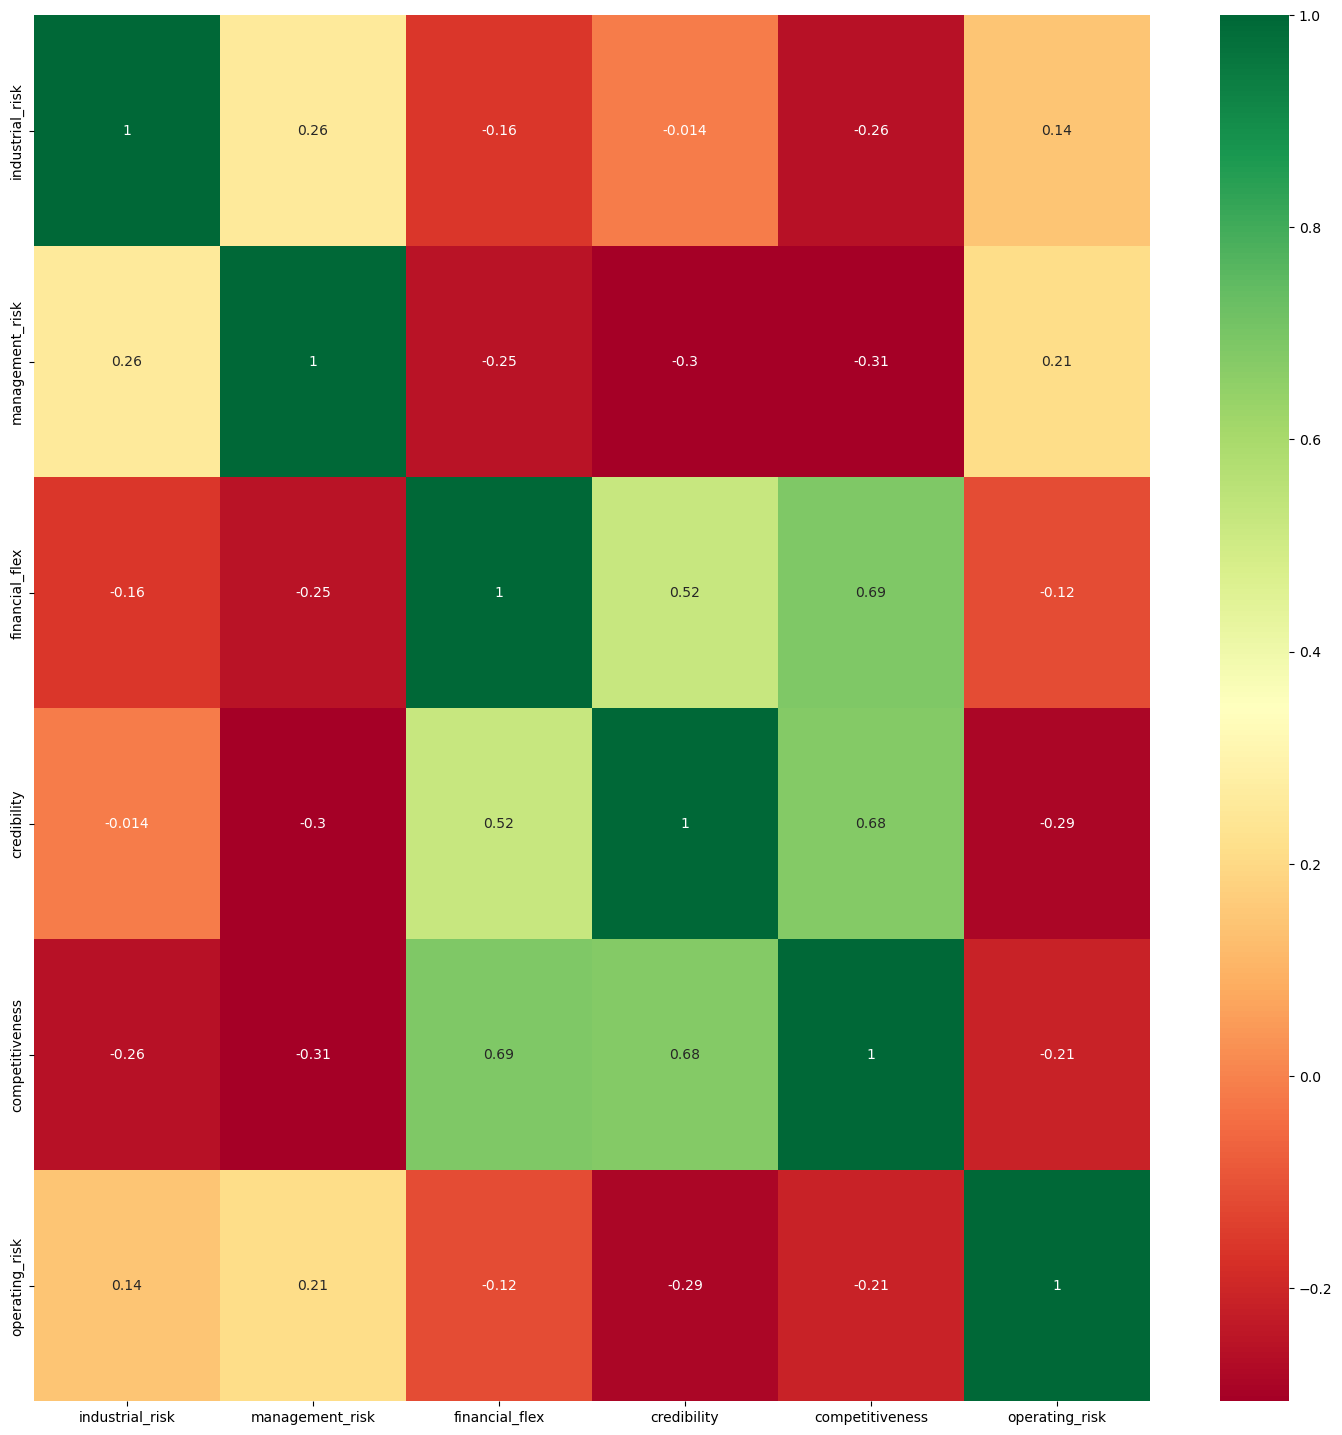

In [19]:
# Heatmap
plt.figure(figsize=(18,18))
sns.heatmap(data1.corr(), annot=True, cmap='RdYlGn');

The Competitiveness columns has some high correlations with Financial Flexibility and Credibility.

## Univariate plots
### Data Visualization of numerical Features

### Histogram

These will give accurate information about the distribution of data.

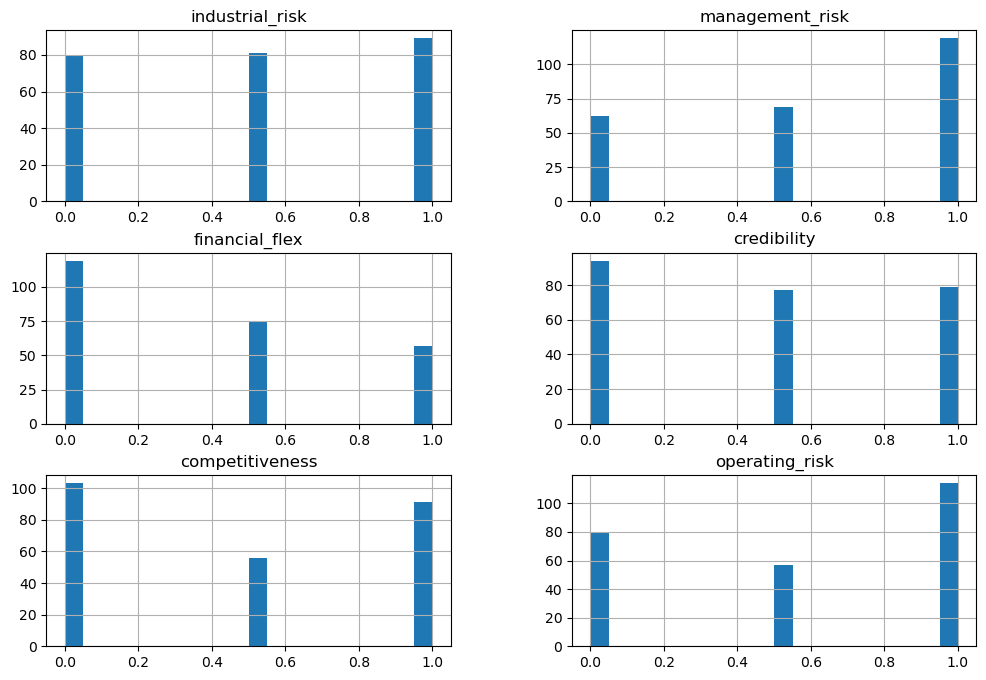

In [20]:
data1.hist(figsize=(12, 8),bins=20);

We can see that in all the columns, the data is distributed at 0, 0.5, and 1 values.

## Scatterplot between variables 

These plots are used to understand the correlations between different columns in a graphical manner.

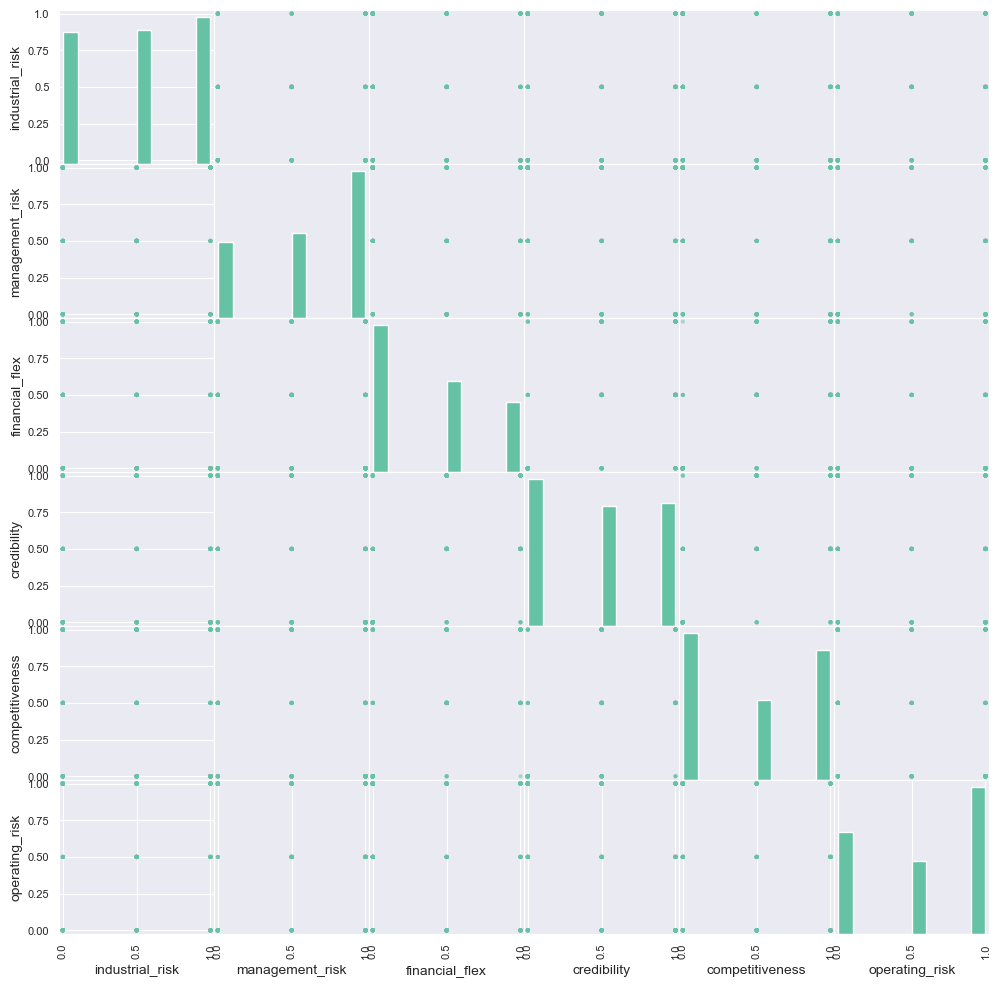

In [21]:
# Set the background style and palette 
sns.set_style('darkgrid')
sns.set_palette('Set2')

# Scatterplot Matrix
from pandas.plotting import scatter_matrix

scatter_matrix(data1, figsize=(12, 12))
plt.show()

<Figure size 800x1500 with 0 Axes>

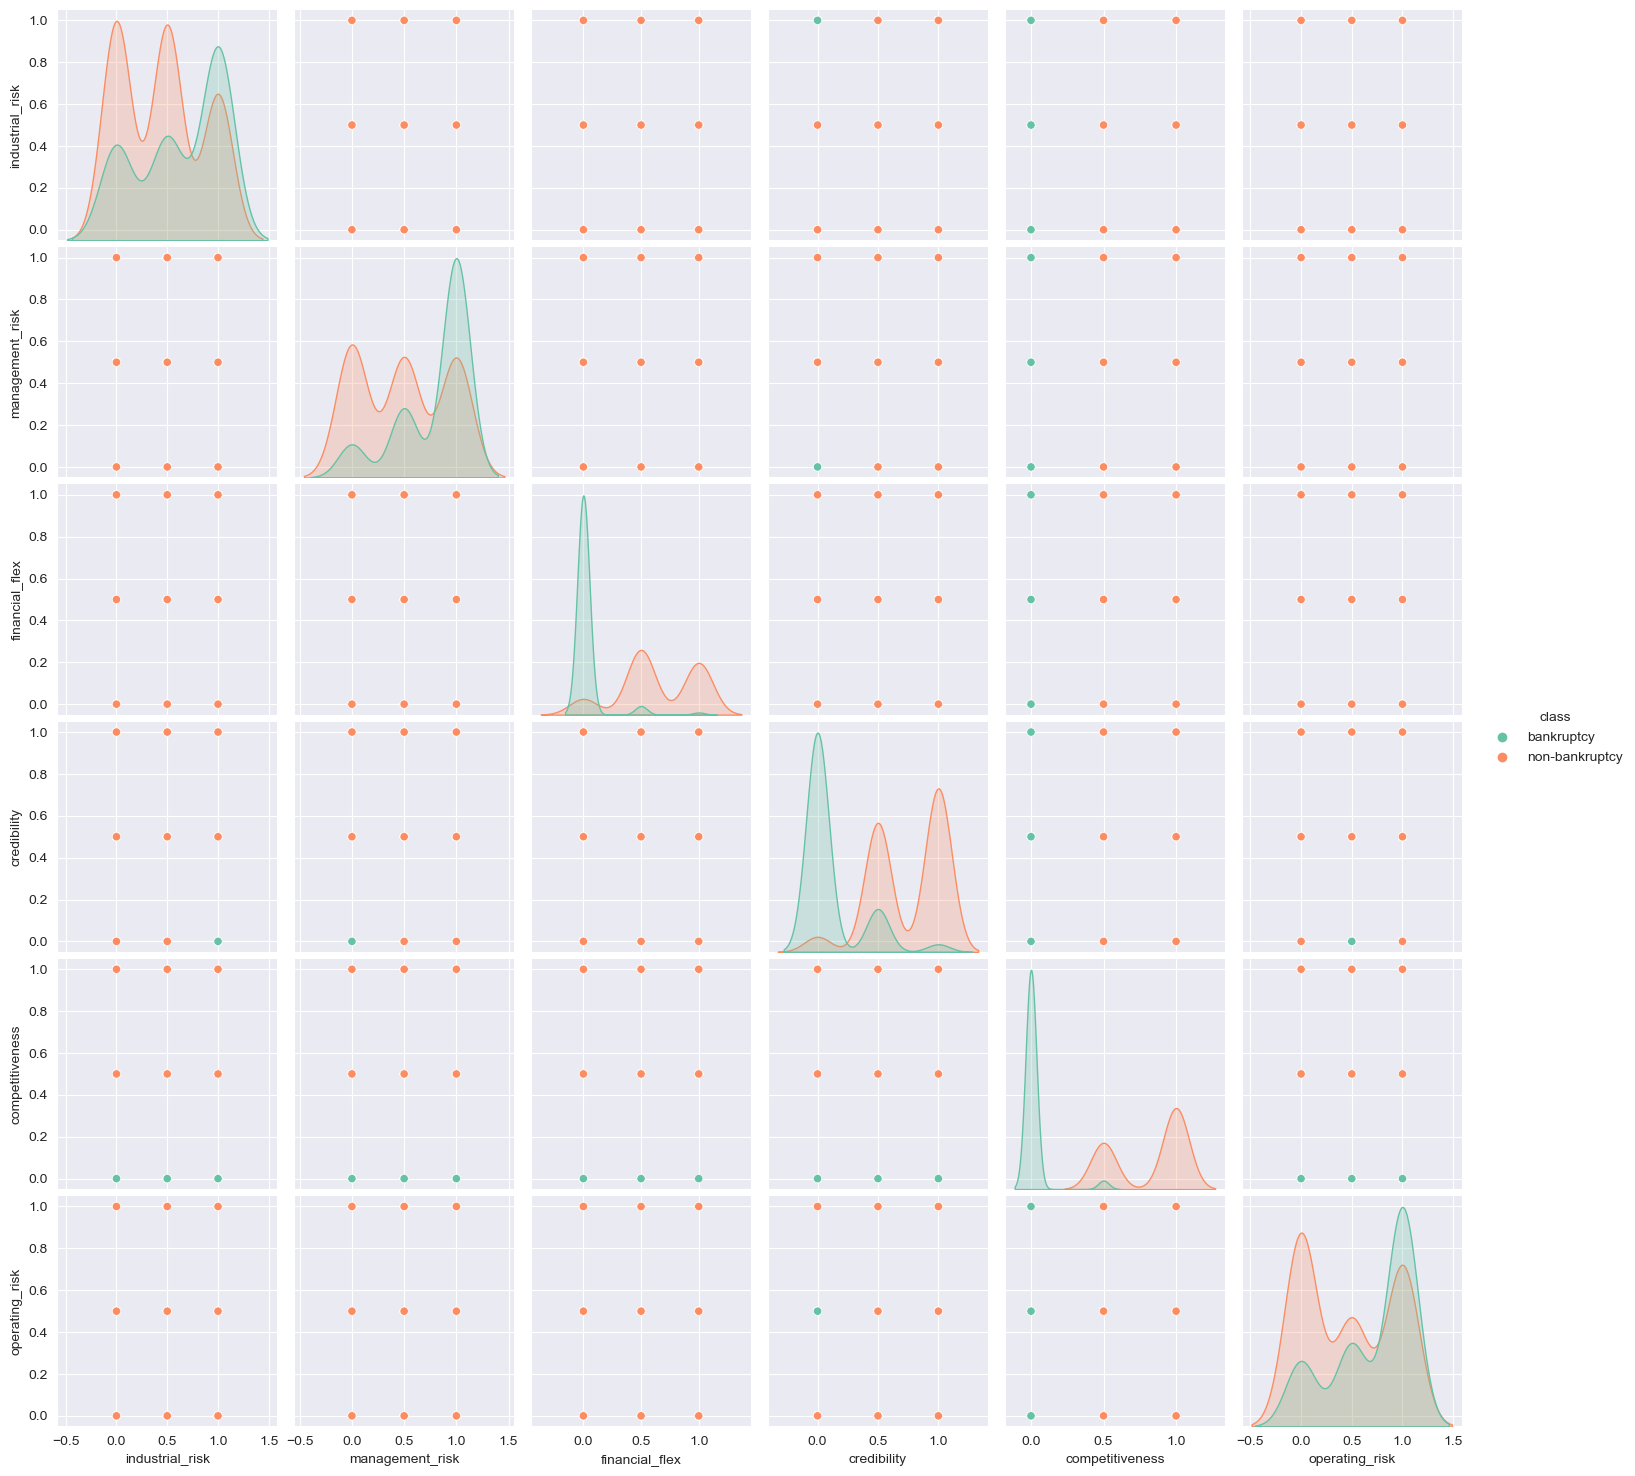

In [22]:
# Pairplot
# Set the size of the overall figure
plt.figure(figsize=(8, 15))

# Pairplot of train dataset
sns.pairplot(data1, hue='class');

Since the distribution of the data in all the columns is restricted to only 3 specific values, the graphical representation of these correlations is not that clear when compared to the correlation matrix above.


### Boxplot

A boxplot is a graphical representation of the distribution of a dataset, showing the median, quartiles, and potential outliers.

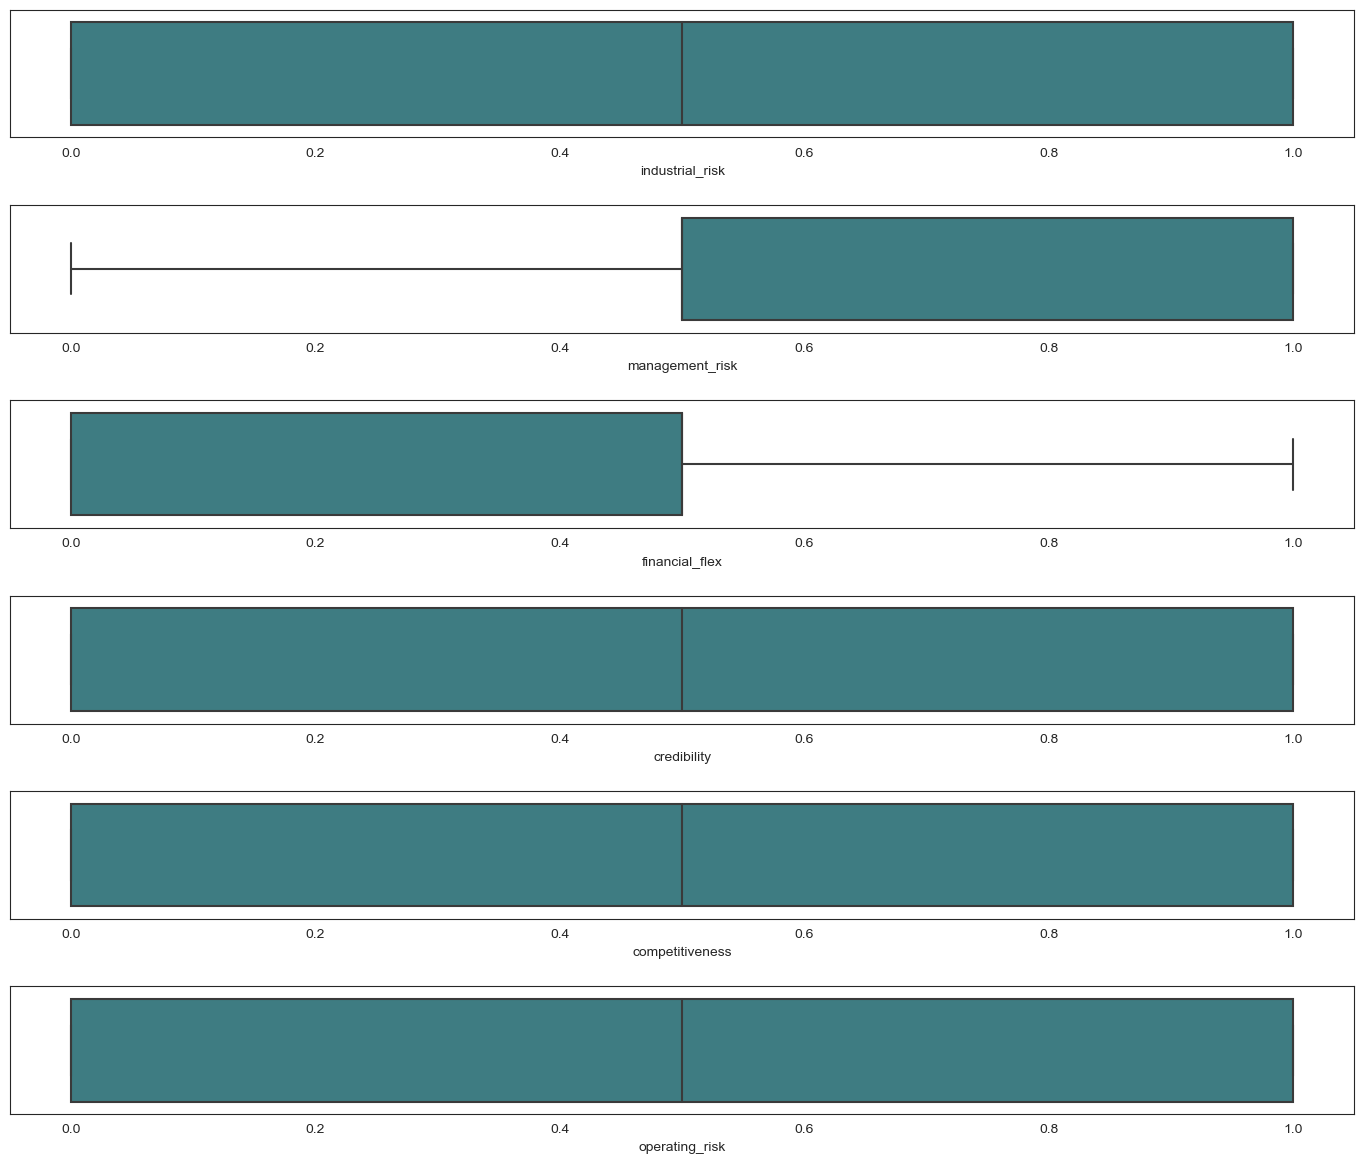

In [23]:
ot = data1.copy()

sns.set_style('white')
fig, axes = plt.subplots(6,1,figsize=(14,12), sharex=False, sharey=False)

sns.boxplot(x='industrial_risk', data=ot, palette='crest', ax=axes[0])
sns.boxplot(x='management_risk', data=ot, palette='crest', ax=axes[1])
sns.boxplot(x='financial_flex', data=ot, palette='crest', ax=axes[2])
sns.boxplot(x='credibility', data=ot, palette='crest', ax=axes[3])
sns.boxplot(x='competitiveness', data=ot, palette='crest', ax=axes[4])
sns.boxplot(x='operating_risk', data=ot, palette='crest', ax=axes[5])

plt.tight_layout(pad=2.0)

**We can observe that there are no outliers in all the above features.**

### Density Plot

A density plot is a data visualization that displays the distribution of a continuous dataset by estimating its probability density, often resembling a smoothed histogram.

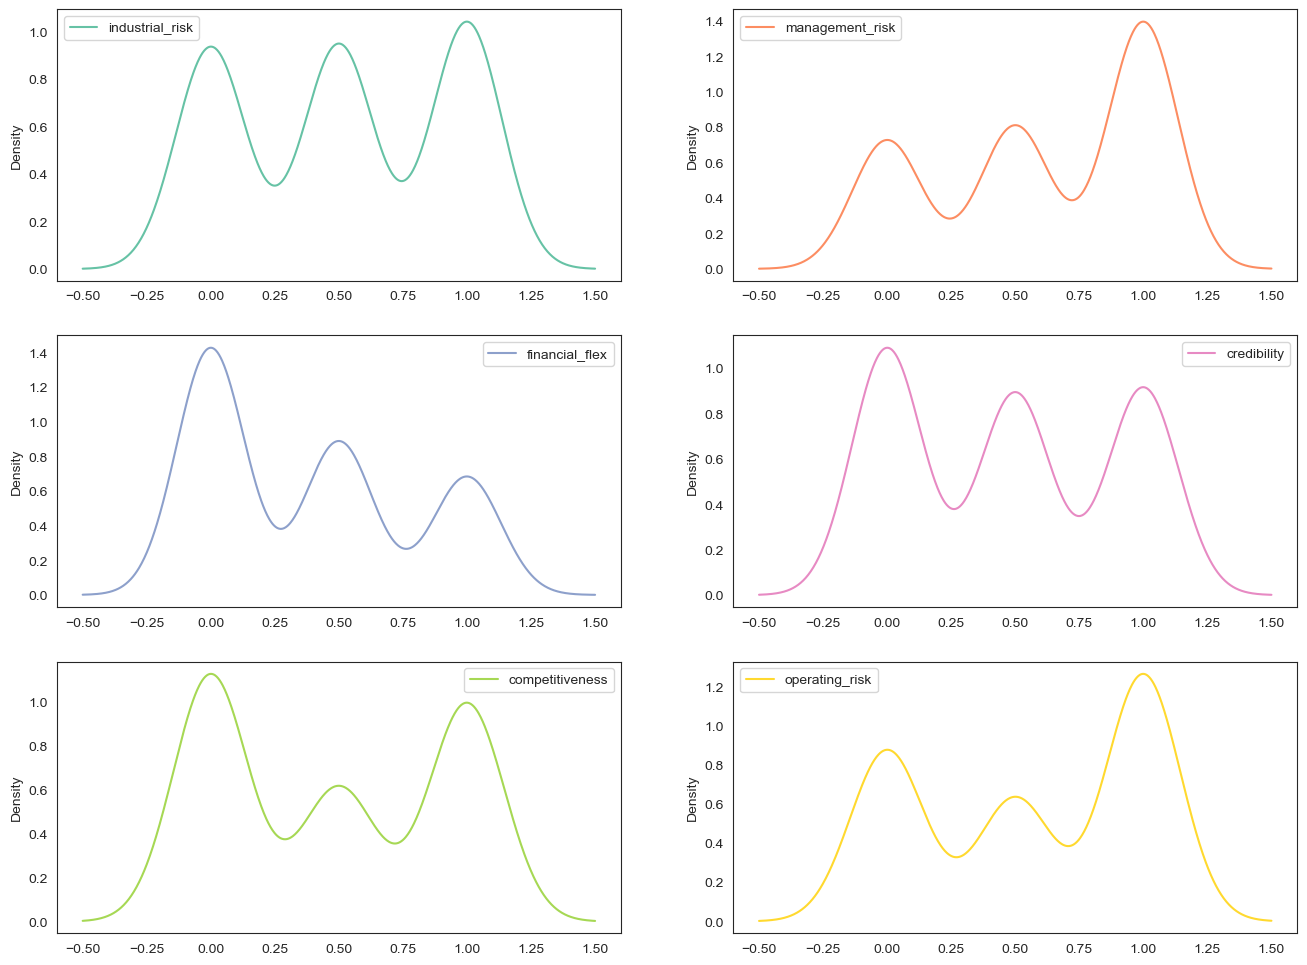

In [24]:
data1.plot(kind='density' , subplots=True, layout=(3,2), figsize=(16, 12), sharex=False )
plt.show()

### Distribution plot

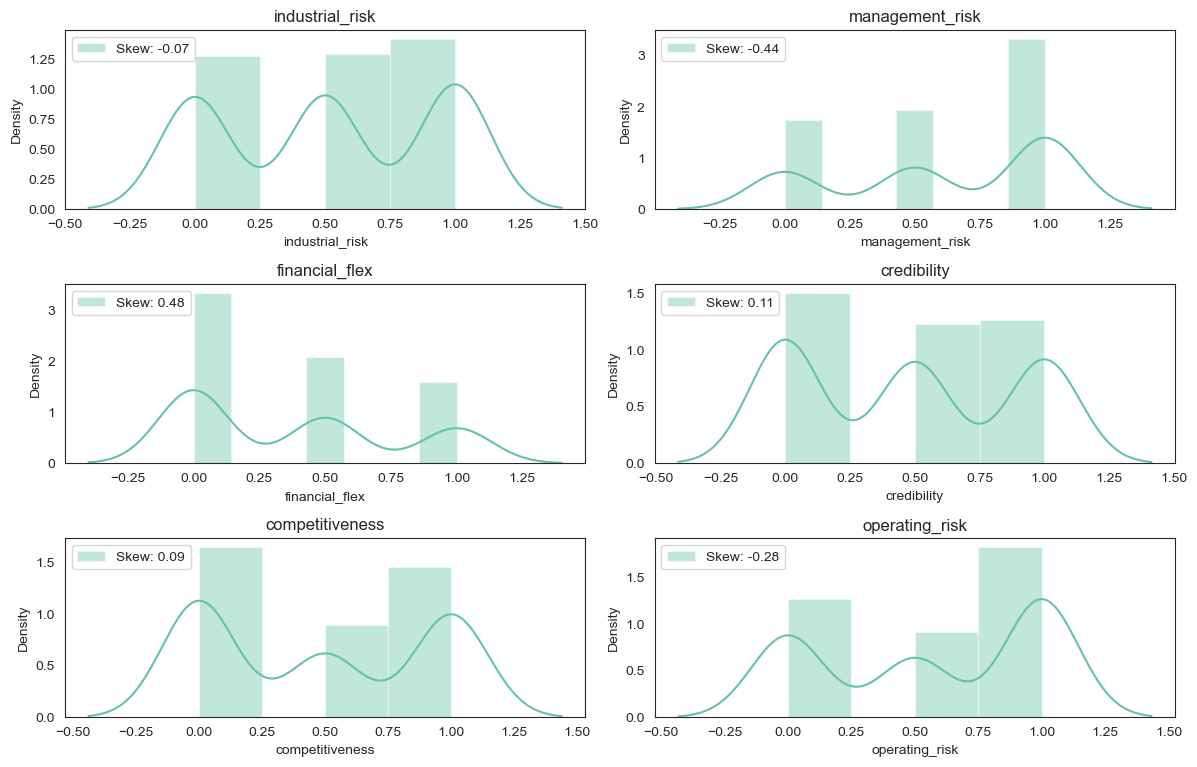

In [25]:
# Distplot
plt.figure(figsize=(12, 15))  
for i, column in enumerate(num_features, 1):
    plt.subplot(6, 2, i)  
    skew = data1[column].skew()
    sns.distplot(data1[column], label=f'Skew: {skew:.2f}')
    plt.legend(loc='upper left') 
    plt.title(column)

plt.tight_layout();

For skewness, values close to zero (such as industrial_risk, management_risk, and operating_risk) indicate that the data is approximately symmetrically distributed. Conversely, for financial_flexibility, credibility, and competitiveness, the positive and negative values suggest slight departures from symmetry.
 

### Analyzing the relationship of independent features with respect to the Target feature

In [26]:
for column in num_features:
    print(pd.crosstab(data1[column], data1['class']))
    print('-'*50)


class            bankruptcy  non-bankruptcy
industrial_risk                            
0.0                      26              54
0.5                      28              53
1.0                      53              36
--------------------------------------------------
class            bankruptcy  non-bankruptcy
management_risk                            
0.0                      11              51
0.5                      23              46
1.0                      73              46
--------------------------------------------------
class           bankruptcy  non-bankruptcy
financial_flex                            
0.0                    102              17
0.5                      4              70
1.0                      1              56
--------------------------------------------------
class        bankruptcy  non-bankruptcy
credibility                            
0.0                  87               7
0.5                  17              60
1.0                   3         

### Count plot

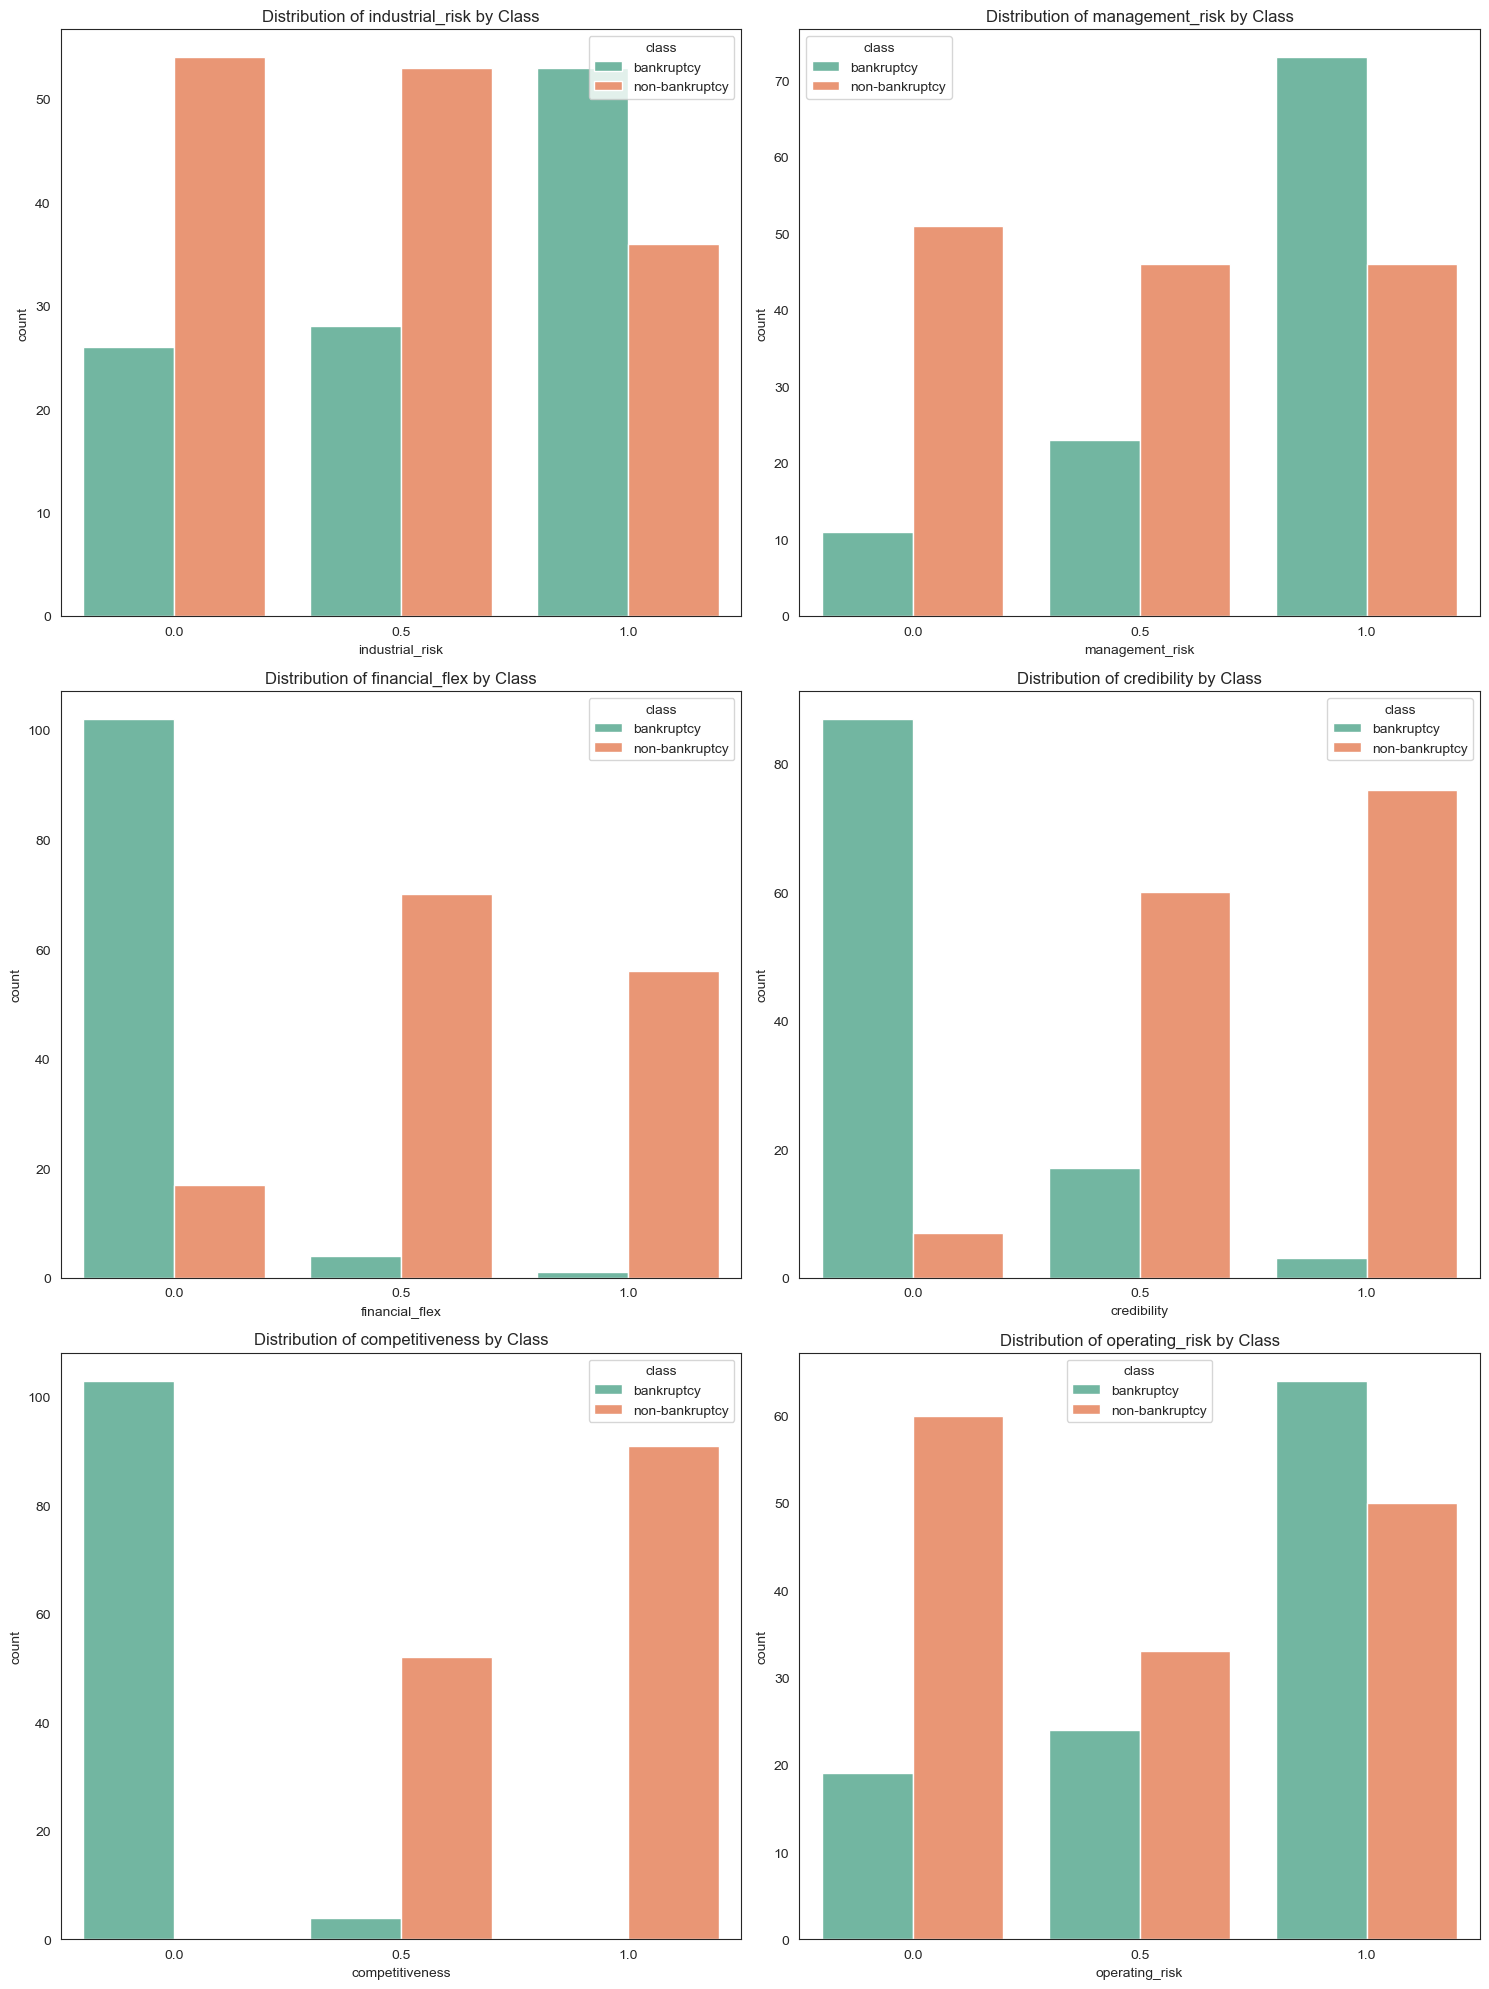

In [27]:
plt.figure(figsize=(15, 20))
for i, predictor in enumerate(data1.drop(columns = ['class'])):
    ax = plt.subplot(3, 2, i + 1)
    sns.countplot(data=data1, x=predictor, hue='class')
    plt.title(f'Distribution of {predictor} by Class')
    plt.tight_layout();

From the above illustrations we can understand that when the Industrial Risk, Management Risk, and Operating Risk are high, that is with values of 1, the chances of the company going bankrupt is very high.

Similarly, the other traits like Financial Flexibility, Credibility, and Competitiveness when high will reduce the chances of a company going bankrupt.

### Risk Factor

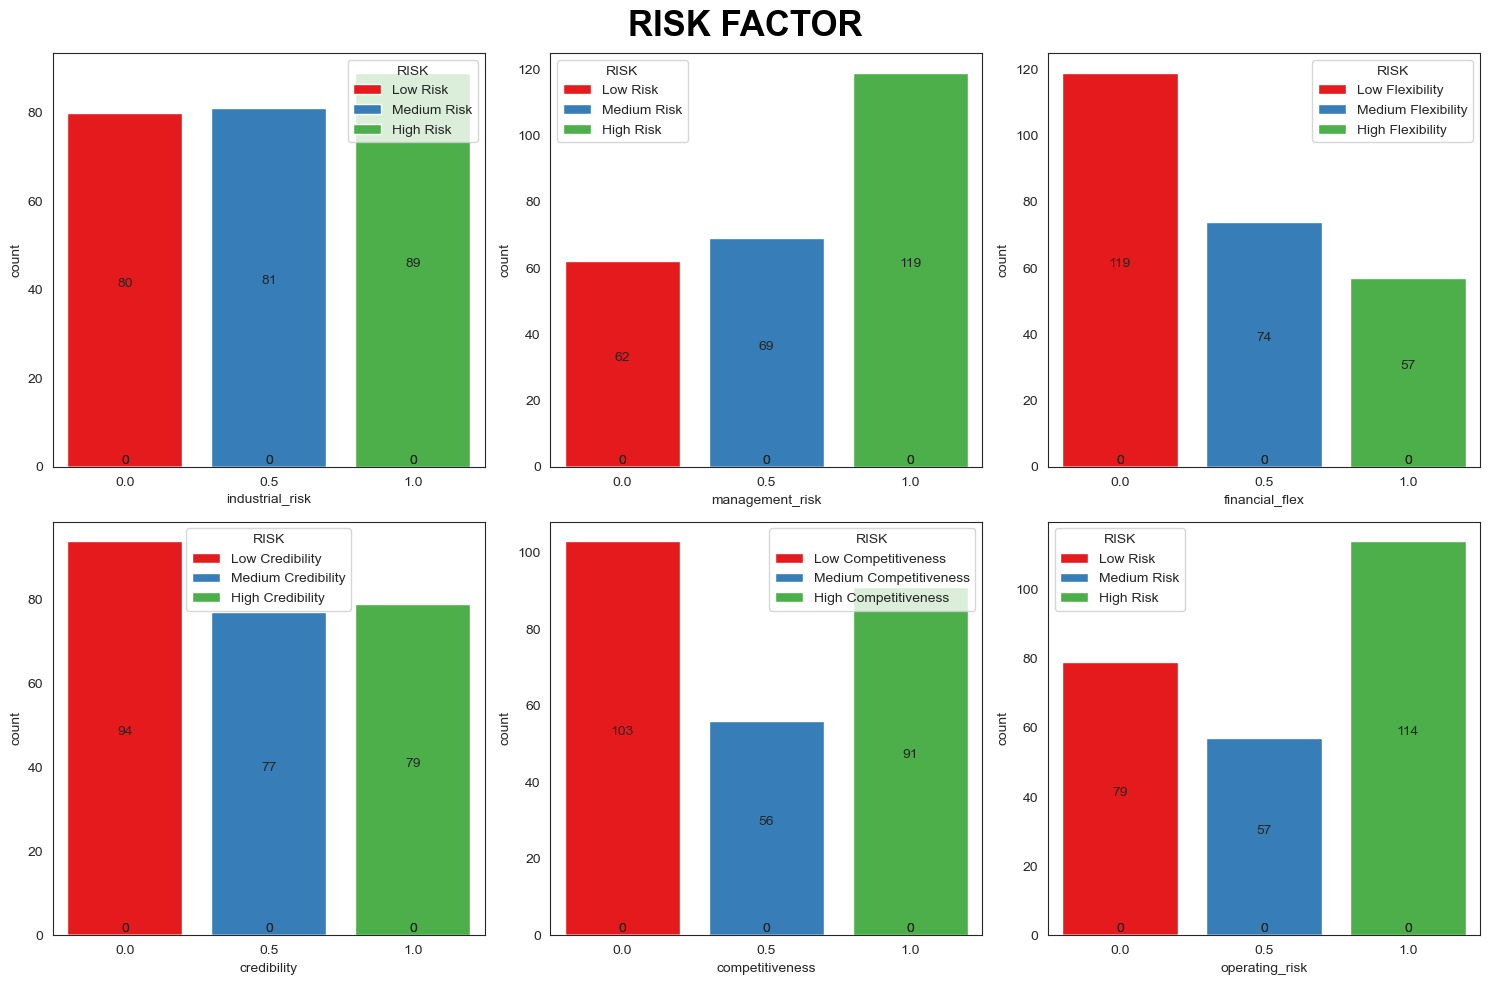

In [28]:
# Define a color palette for your plots
palette = sns.color_palette("Set1")

# Create subplots
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

# Set the overall title
fig.suptitle('RISK FACTOR', fontsize=25, fontweight='bold', color='black')

# Define risk labels for each feature
risk_labels = [
    ['Low Risk', 'Medium Risk', 'High Risk'],
    ['Low Risk', 'Medium Risk', 'High Risk'],
    ['Low Flexibility', 'Medium Flexibility', 'High Flexibility'],
    ['Low Credibility', 'Medium Credibility', 'High Credibility'],
    ['Low Competitiveness', 'Medium Competitiveness', 'High Competitiveness'],
    ['Low Risk', 'Medium Risk', 'High Risk']
]

# Iterate through your features and create count plots
for i, feature in enumerate(num_features):
    row = i // 3
    col = i % 3

    sns.countplot(
        x=feature,
        data=data1,
        hue=feature,
        saturation=1.3,
        ax=ax[row, col],
        dodge=False,
        palette=palette  
    )

    # Set the legend
    ax[row, col].legend(title='RISK', labels=risk_labels[i])

    # Add text labels to the bars
    for p in ax[row, col].patches:
        if not p.get_height() == p.get_height():
            height = 0
        else:
            height = p.get_height()
            ax[row, col].text(p.get_x() + p.get_width() / 2, height / 2, int(height), ha='center', va='bottom')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


### Data Visualization of Categorical Feature

In [29]:
data1['class'].unique()

array(['bankruptcy', 'non-bankruptcy'], dtype=object)

In [30]:

data1['class'].value_counts()

non-bankruptcy    143
bankruptcy        107
Name: class, dtype: int64

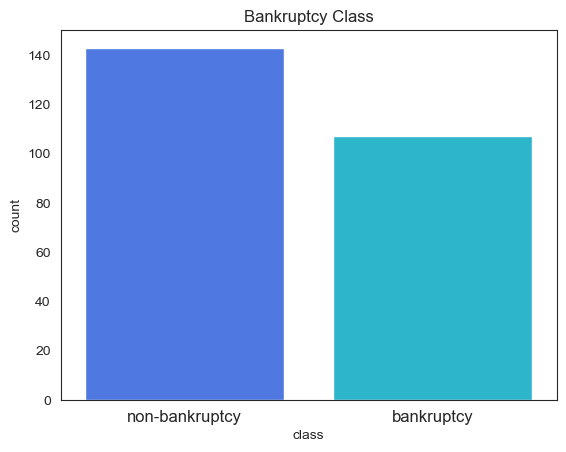

In [31]:
pal = sns.color_palette('rainbow')
sns.countplot(x='class', data=data1, palette = pal, 
              order=data1['class'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Bankruptcy Class');

In this specific case, the "Non-Bankruptcy" class constitutes the majority class with 143 observations, while the "Bankruptcy" class represents the minority class with only 107 observations. 

### Pie chart

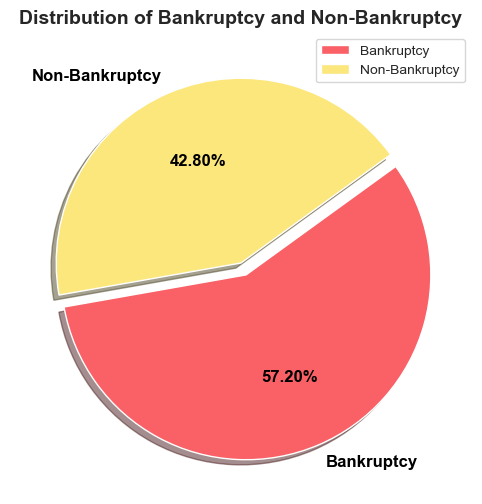

In [32]:
class_counts = data1['class'].value_counts()
labels = ['Bankruptcy', 'Non-Bankruptcy']
colors = ['#F96167', '#FCE77D']
explode = (0.07, 0.0)
autopct_format = '%.2f%%'

# Figure and axis setup
fig, ax = plt.subplots(figsize=(10, 6))
ax.pie(class_counts, 
       labels=labels, 
       explode=explode, 
       autopct=autopct_format, 
       colors=colors,
       shadow=True, 
       startangle=190, 
       textprops={'size': 'large', 
                  'fontweight': 'bold', 
                  'rotation': 0, 
                  'color': 'black'})

# Add legend and title
ax.legend(loc='upper right')
ax.set_title("Distribution of Bankruptcy and Non-Bankruptcy", fontsize=14, fontweight='bold')

plt.show()


### SweetViz Report for Data Analysis

                                             |                                             | [  0%]   00:00 ->…


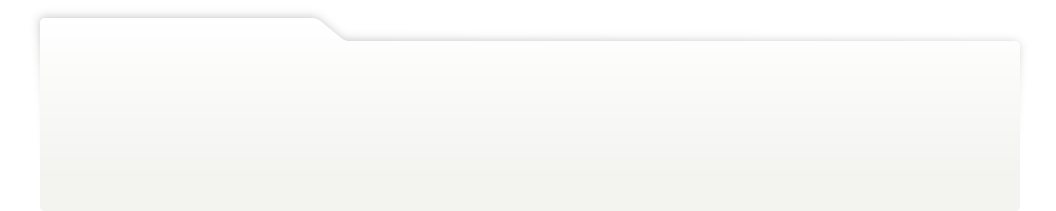
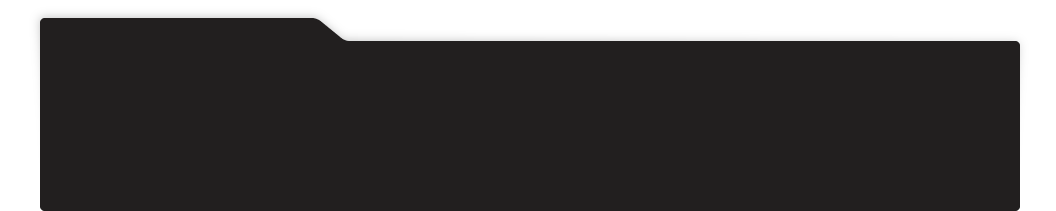
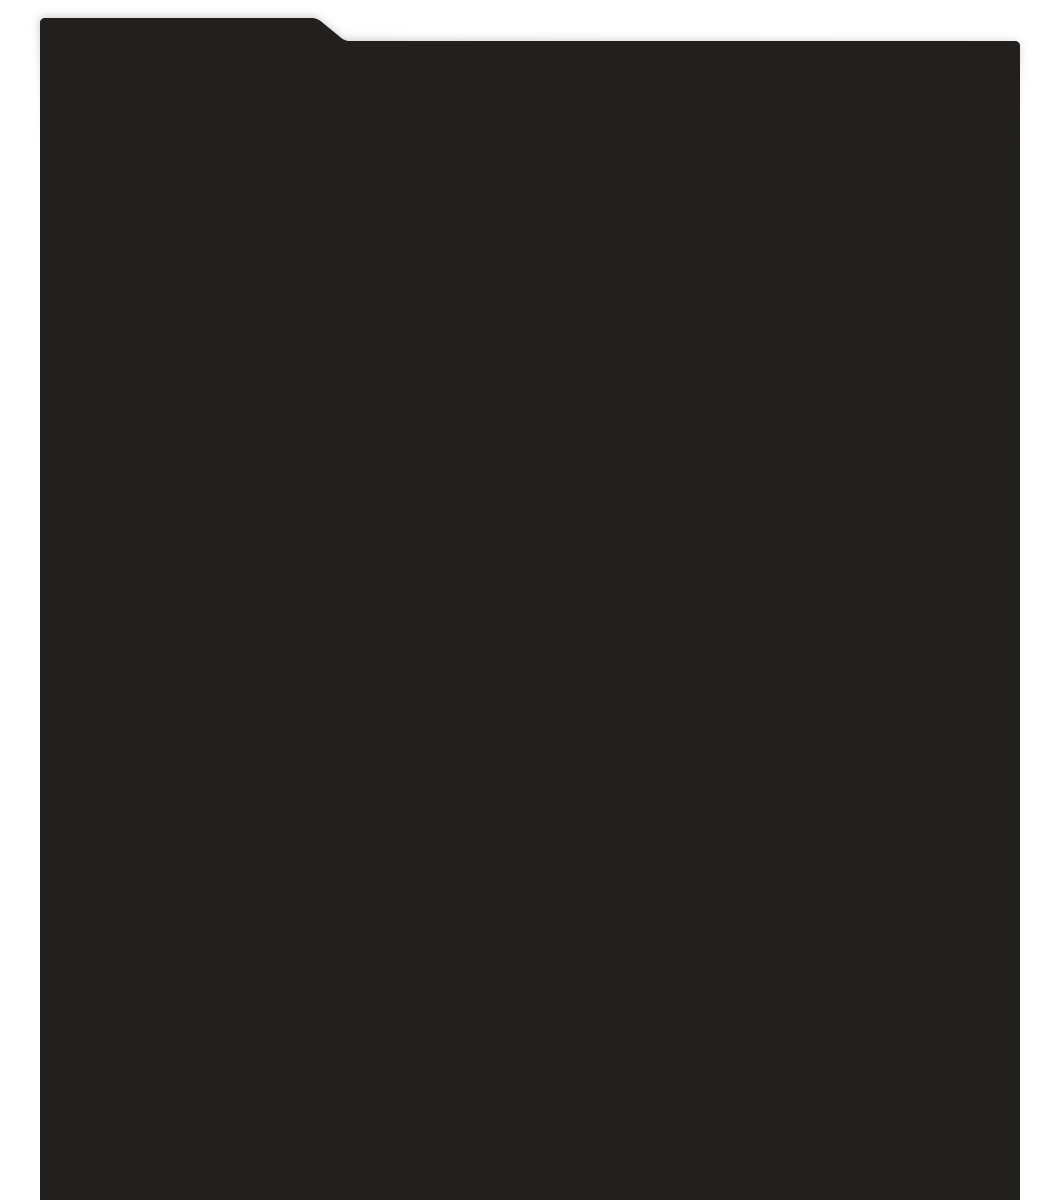
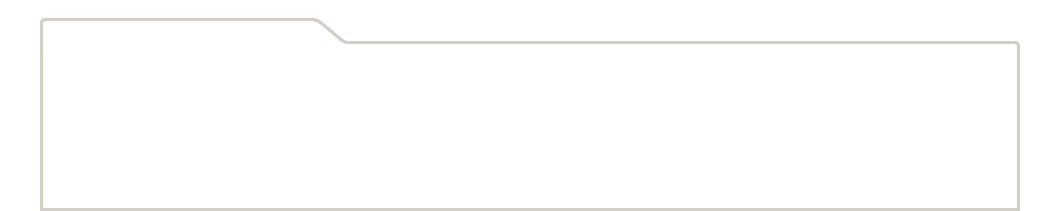
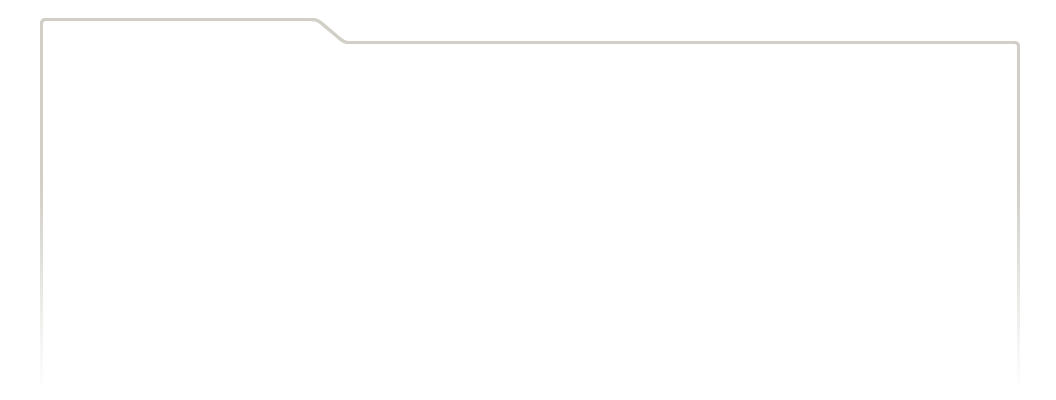
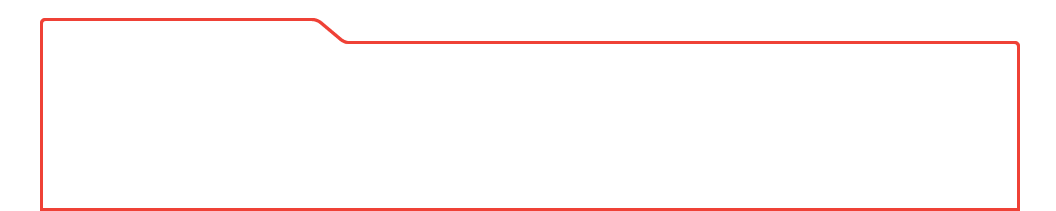
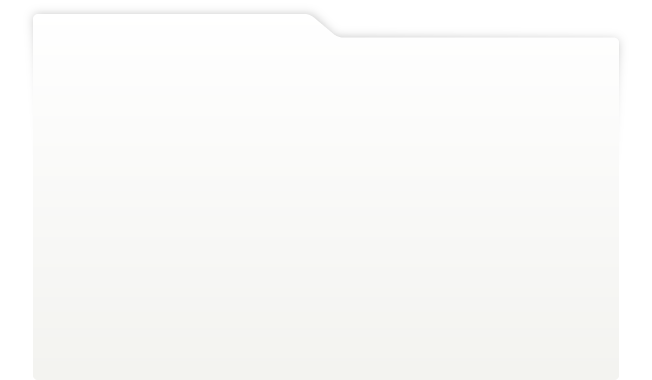
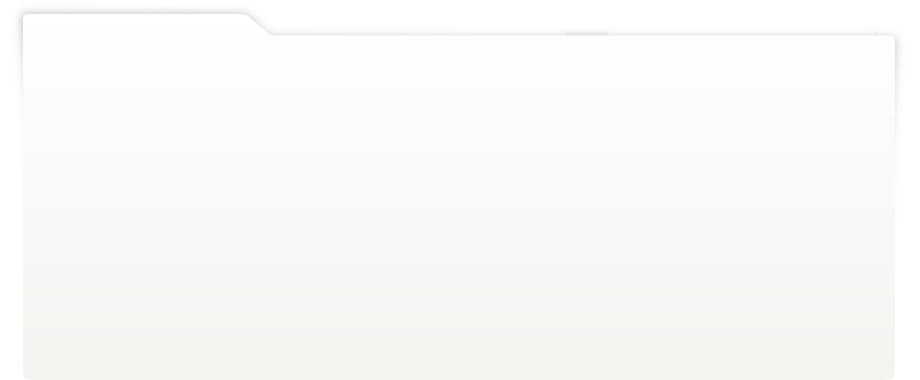
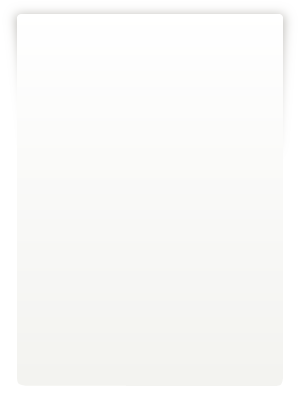
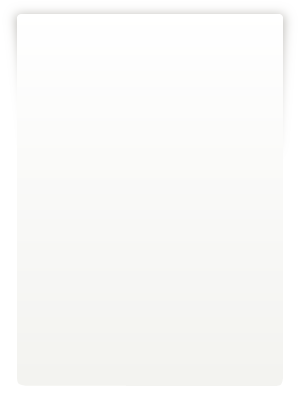
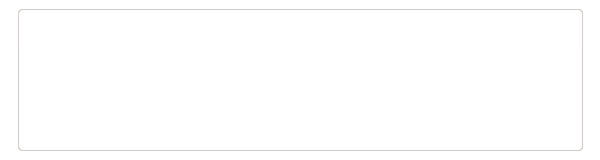
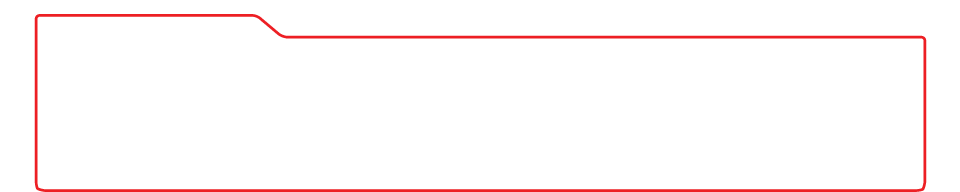
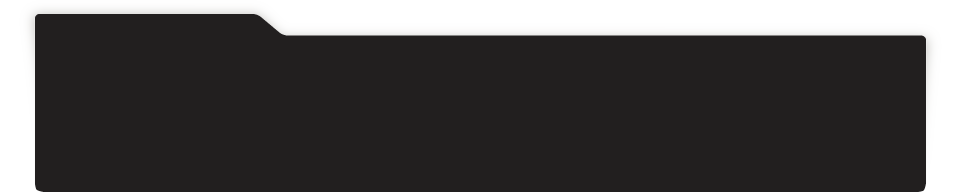
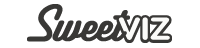
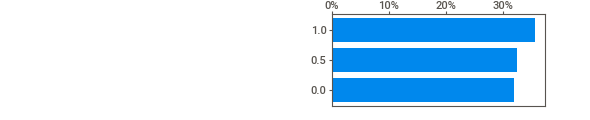
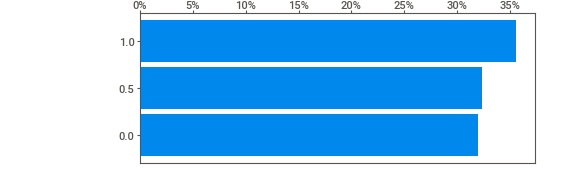
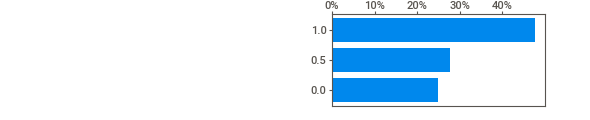
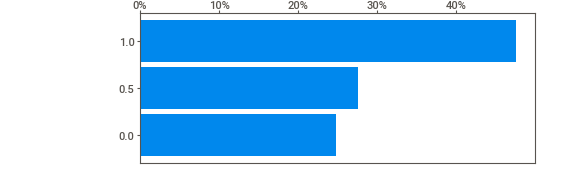
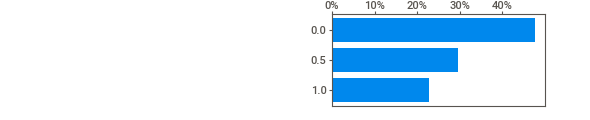
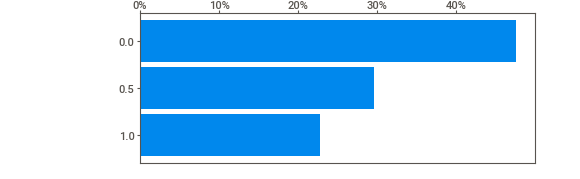
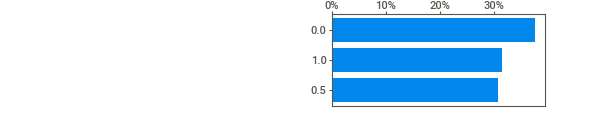
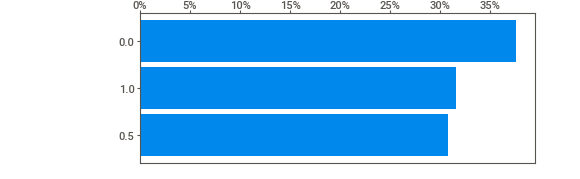
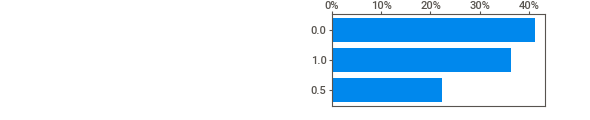
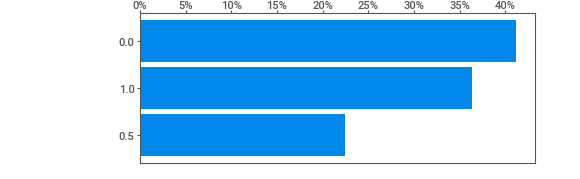
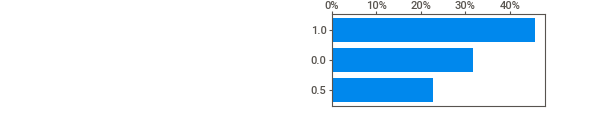
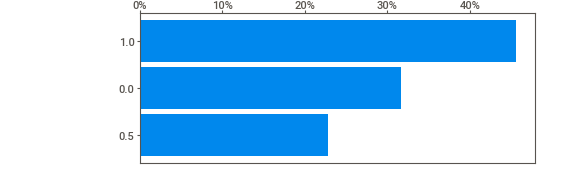
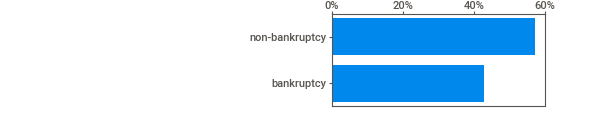
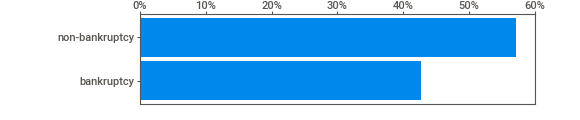
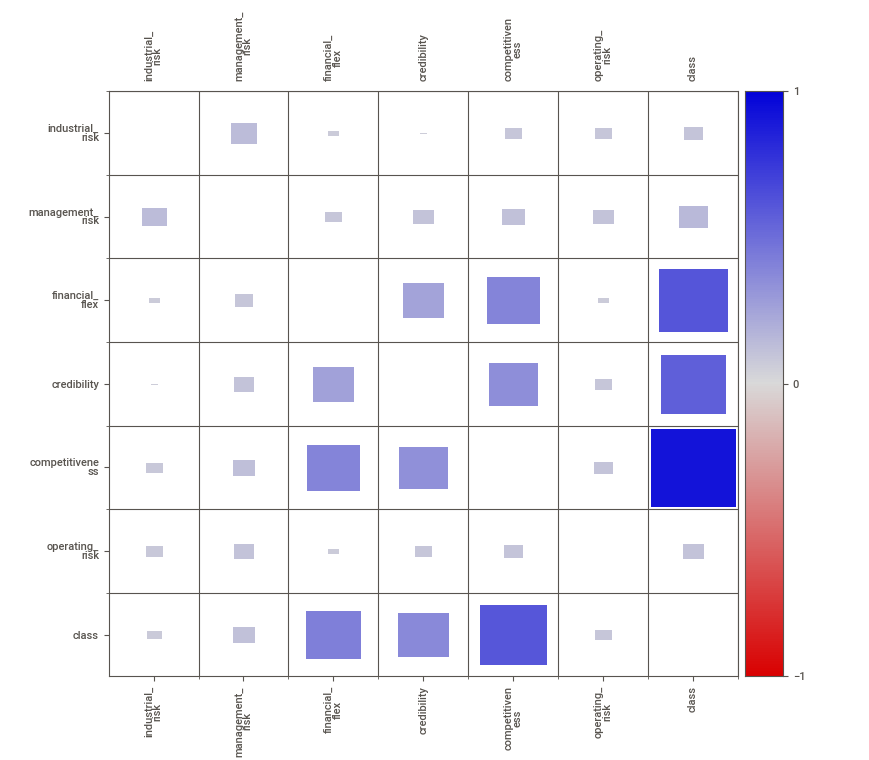
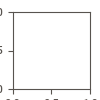

In [33]:
import sweetviz as sv
sweet_report = sv.analyze(data1)
sweet_report.show_notebook(layout='vertical' , w=880, h=700, scale=0.8)

## Data Transformations

#### Here are we taking a bankruptcy = 0 and Non-bankruptcy=1 by encoding data

In [34]:
# Encoding the categorical columns by using label encoder
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
data1['class'] = encode.fit_transform(data1['class'])
data1

,industrial_risk,management_risk,financial_flex,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,1
246,1.0,1.0,0.5,1.0,1.0,0.0,1
247,0.0,1.0,1.0,0.5,0.5,0.0,1
248,1.0,0.0,0.5,1.0,0.5,0.0,1


## Split Data into X and y

In [35]:
X = data1.iloc[:,:-1] # indepedent variables
Y = data1.iloc[:,-1] # depedent variables

In [36]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int32

### Data Rescaling

Min-Max scaling, which transforms feature values to fall within the range of 0 to 1.

In [37]:
from numpy import set_printoptions
# Minmaxscaler numerical features.
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(X)

# summarize transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[0.5 1.  0.  0.  0.  0.5]
 [0.  1.  0.  0.  0.  1. ]
 [1.  0.  0.  0.  0.  1. ]
 [0.5 0.  0.  0.5 0.  1. ]
 [1.  1.  0.  0.  0.  1. ]]


### Splitting the dataset into training and testing sets

In [38]:
# Split X and y into training and test set in 70:30 ratio

X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size=0.3 ,random_state=42)

In [39]:
print('Shape of x_train: ', X_train.shape)
print('Shape of x_test: ', X_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of x_train:  (175, 6)
Shape of x_test:  (75, 6)
Shape of y_train:  (175,)
Shape of y_test:  (75,)


In [40]:
X_train

,industrial_risk,management_risk,financial_flex,credibility,competitiveness,operating_risk
82,0.0,1.0,0.0,0.0,0.0,1.0
29,0.0,0.5,0.0,0.0,0.0,1.0
126,0.5,0.5,0.5,1.0,1.0,0.5
79,0.0,0.5,0.0,0.0,0.0,0.5
86,0.5,0.5,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
106,0.0,1.0,0.0,0.0,0.5,0.5
14,0.0,1.0,0.0,0.0,0.5,0.5
92,0.5,1.0,0.0,0.0,0.0,0.5
179,0.0,0.5,1.0,0.5,1.0,0.0


In [41]:
y_train

82     0
29     0
126    1
79     0
86     0
      ..
106    0
14     0
92     0
179    1
102    0
Name: class, Length: 175, dtype: int32

## Feature Extraction Techniques

To understand which features plays an important role in making the predictions.

### 1.Recursive Feature Elimination - RFE

RFE is a feature selection technique that iteratively eliminates less important features based on an algorithm and importance-ranking metric to identify the most relevant subset of features.

In [42]:
# Feature Extraction with RFE(Recursive Feature Elimination)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# load data
data2 = data1.copy()

x = data2.iloc[:,:6]
y = data2.iloc[:,-1]


# feature extraction
model = LogisticRegression(max_iter=500)


rfe = RFE(model, n_features_to_select=4)
fit = rfe.fit(x, y)

fit.n_features_

4

In [43]:
fit.support_

array([False,  True,  True,  True,  True, False])

In [44]:
fit.ranking_

array([2, 1, 1, 1, 1, 3])

In [45]:
data2.columns

Index(['industrial_risk', 'management_risk', 'financial_flex', 'credibility',
       'competitiveness', 'operating_risk', 'class'],
      dtype='object')

**The results above indicate that columns 0 (industrial_risk) and 5 (operating_risk) are less important compared to other features. However, based on our domain knowledge, we cannot drop these columns.**

**It's essential to understand that these methods have identified a subset of features as more significant, but it's crucial to remember that every variable is expected to contribute to predicting a company's bankruptcy. Consequently, all variables will be retained and included in the model-building process.**

## Model Building

## 1. Logistic Regression

In [46]:
# Import necessary libraries

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score


In [47]:
# Fit the Model to the Training Data
LR_model = LogisticRegression(random_state = 42)
LR_model.fit(X_train,y_train)

LogisticRegression(random_state=42)

### Calculation of the Metrics

### Testing the Logistic Regression Model on the Training Set

In [48]:
train_ypred1 = LR_model.predict(X_train)

# calculation of metrics
print("Training data Result:")

score1 = accuracy_score(y_train , train_ypred1)
print("Accuracy: %0.4f", score1)
print('-'*70)
print("Precision: %0.4f", precision_score(y_train , train_ypred1))
print('-'*70)
print("Recall: %0.4f", recall_score(y_train , train_ypred1))
print('-'*70)
print("F1_score: %0.4f", f1_score(y_train , train_ypred1))
print('-'*70)
print("AUC : %0.4f" , roc_auc_score(y_train , train_ypred1))
print('-'*70)
print("Classification Report: \n",classification_report(y_train , train_ypred1))
print('-'*70)
print("confusion matrix:\n", confusion_matrix(y_train, train_ypred1))

Training data Result:
Accuracy: %0.4f 0.9942857142857143
----------------------------------------------------------------------
Precision: %0.4f 0.9893617021276596
----------------------------------------------------------------------
Recall: %0.4f 1.0
----------------------------------------------------------------------
F1_score: %0.4f 0.9946524064171123
----------------------------------------------------------------------
AUC : %0.4f 0.9939024390243902
----------------------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        82
           1       0.99      1.00      0.99        93

    accuracy                           0.99       175
   macro avg       0.99      0.99      0.99       175
weighted avg       0.99      0.99      0.99       175

----------------------------------------------------------------------
confusion matrix:
 [[81  1]
 [ 0 93]]


### Testing the Logistic Regression Model on the Testing Set

In [49]:
test_ypred1 = LR_model.predict(X_test)

# calculation of metrics

print("Testing data Result:")
acc1 = accuracy_score(y_test, test_ypred1)
print("Accuracy: %0.4f",acc1)
print('-'*70)
precision1 = precision_score(y_test, test_ypred1)
print("Precision: %0.4f", precision1)
print('-'*70)
recall1= recall_score(y_test, test_ypred1)
print("Recall: %0.4f", recall1)
print('-'*70)
f1 = f1_score(y_test, test_ypred1)
print("F1_score: %0.4f", f1)
print('-'*70)
print("AUC : %0.4f" , roc_auc_score(y_test, test_ypred1))
print('-'*70)
print("Classification Report: \n",classification_report(y_test , test_ypred1))


Testing data Result:
Accuracy: %0.4f 1.0
----------------------------------------------------------------------
Precision: %0.4f 1.0
----------------------------------------------------------------------
Recall: %0.4f 1.0
----------------------------------------------------------------------
F1_score: %0.4f 1.0
----------------------------------------------------------------------
AUC : %0.4f 1.0
----------------------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        50

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



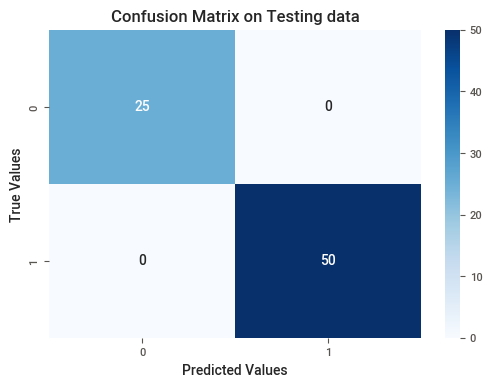

In [50]:
# calculation of confusion matrix on testing data
conf_matrix = confusion_matrix(y_test , test_ypred1)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Confusion Matrix on Testing data');


#### Check for overfitting and underfitting

In [51]:
# print the scores on training and test set

print('Training set score: {:.2f}%'.format(LR_model.score(X_train, y_train)*100))

print('Test set score: {:.2f}%'.format(LR_model.score(X_test, y_test)*100))

Training set score: 99.43%
Test set score: 100.00%


The training and testing accuracies are quite similar, indicating that our model has neither overfitted nor underfitted.

## 2. Naive Bayes

In [52]:
# Naive Bayes model with GaussianNB
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)


GaussianNB()

#### Testing the Naive Bayes model on the Training set

In [53]:
train_ypred2 = NB_model.predict(X_train)

# calculation of metrics
print("Training data Result:")
score2 = accuracy_score(y_train , train_ypred2)
print("Accuracy: %0.4f",score2)
print('-'*70)
print("Precision: %0.4f", precision_score(y_train , train_ypred2))
print('-'*70)
print("Recall: %0.4f", recall_score(y_train , train_ypred2))
print('-'*70)
print("F1_score: %0.4f", f1_score(y_train , train_ypred2))
print('-'*70)
print("AUC : %0.4f" , roc_auc_score(y_train , train_ypred2))
print('-'*70)
print("Classification Report: \n",classification_report(y_train , train_ypred2))
print('-'*70)
print("confusion matrix:\n", confusion_matrix(y_train, train_ypred2))

Training data Result:
Accuracy: %0.4f 0.9714285714285714
----------------------------------------------------------------------
Precision: %0.4f 0.9489795918367347
----------------------------------------------------------------------
Recall: %0.4f 1.0
----------------------------------------------------------------------
F1_score: %0.4f 0.9738219895287958
----------------------------------------------------------------------
AUC : %0.4f 0.9695121951219512
----------------------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        82
           1       0.95      1.00      0.97        93

    accuracy                           0.97       175
   macro avg       0.97      0.97      0.97       175
weighted avg       0.97      0.97      0.97       175

----------------------------------------------------------------------
confusion matrix:
 [[77  5]
 [ 0 93]]


#### Testing the Naive Bayes model on the Testing set

In [54]:
test_ypred2 = NB_model.predict(X_test)

# calculation of metrics

print("Testing data Result:")
acc2 =  accuracy_score(y_test, test_ypred2)
print("Accuracy: %0.4f", accuracy_score(y_test, test_ypred2))
print('-'*70)
precision2 = precision_score(y_test, test_ypred2)
print("Precision: %0.4f", precision2)
print('-'*70)
recall2= recall_score(y_test, test_ypred2)
print("Recall: %0.4f", recall2)
print('-'*70)
f2 = f1_score(y_test, test_ypred2)
print("F1_score: %0.4f", f2)
print('-'*70)
print("AUC : %0.4f" , roc_auc_score(y_test, test_ypred2))
print('-'*70)
print("confusion matrix:\n", confusion_matrix(y_test, test_ypred2))
print('-'*70)
print("Classification Report: \n",classification_report(y_test , test_ypred2))


Testing data Result:
Accuracy: %0.4f 1.0
----------------------------------------------------------------------
Precision: %0.4f 1.0
----------------------------------------------------------------------
Recall: %0.4f 1.0
----------------------------------------------------------------------
F1_score: %0.4f 1.0
----------------------------------------------------------------------
AUC : %0.4f 1.0
----------------------------------------------------------------------
confusion matrix:
 [[25  0]
 [ 0 50]]
----------------------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        50

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



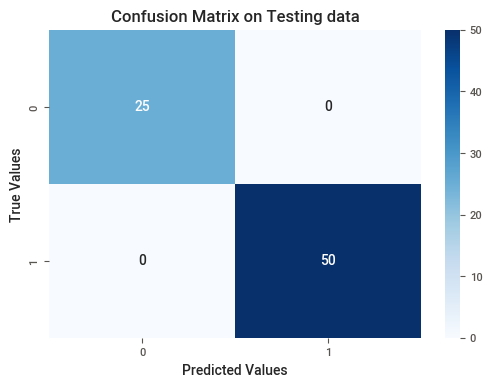

In [55]:
# calculation of confusion matrix on testing data
conf_matrix = confusion_matrix(y_test , test_ypred2)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Confusion Matrix on Testing data');


## 3. K-Nearest Neighbors (KNN):

In [56]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean', p = 2)
KNN_model.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

#### Testing the KNN model on the Training set

In [57]:
train_ypred3 = KNN_model.predict(X_train)

# calculation of metrics
print("Training data Result:")
score3 = metrics.accuracy_score(y_train , train_ypred3)
print("Accuracy: %0.4f",score3)
print('-'*70)
print("Precision: %0.4f", precision_score(y_train , train_ypred3))
print('-'*70)
print("Recall: %0.4f", recall_score(y_train , train_ypred3))
print('-'*70)
print("F1_score: %0.4f", f1_score(y_train , train_ypred3))
print('-'*70)
print("AUC: %0.4f" , roc_auc_score(y_train , train_ypred3))
print('-'*70)
print("Classification Report: \n",classification_report(y_train , train_ypred3))
print('-'*70)
print("confusion matrix:\n", confusion_matrix(y_train, train_ypred3))

Training data Result:
Accuracy: %0.4f 0.9942857142857143
----------------------------------------------------------------------
Precision: %0.4f 0.9893617021276596
----------------------------------------------------------------------
Recall: %0.4f 1.0
----------------------------------------------------------------------
F1_score: %0.4f 0.9946524064171123
----------------------------------------------------------------------
AUC: %0.4f 0.9939024390243902
----------------------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        82
           1       0.99      1.00      0.99        93

    accuracy                           0.99       175
   macro avg       0.99      0.99      0.99       175
weighted avg       0.99      0.99      0.99       175

----------------------------------------------------------------------
confusion matrix:
 [[81  1]
 [ 0 93]]


#### Testing the KNN on the Testing set

In [58]:
test_ypred3 = KNN_model.predict(X_test)

# calculation of metrics

print("Testing data Result:")
acc3 = metrics.accuracy_score(y_test, test_ypred3)
print("Accuracy: %0.4f", accuracy_score(y_test, test_ypred3))
print('-'*70)
precision3 = precision_score(y_test, test_ypred3)
print("Precision: %0.4f", precision3)
print('-'*70)
recall3 = recall_score(y_test, test_ypred3)
print("Recall: %0.4f", recall3)
print('-'*70)
f3 = f1_score(y_test, test_ypred3)
print("F1_score: %0.4f", f3)
print('-'*70)
print("AUC: %0.4f" , roc_auc_score(y_test, test_ypred3))
print('-'*70)
print("confusion matrix:\n", confusion_matrix(y_test, test_ypred3))
print('-'*70)
print("Classification Report: \n",classification_report(y_test , test_ypred3))


Testing data Result:
Accuracy: %0.4f 0.9866666666666667
----------------------------------------------------------------------
Precision: %0.4f 1.0
----------------------------------------------------------------------
Recall: %0.4f 0.98
----------------------------------------------------------------------
F1_score: %0.4f 0.98989898989899
----------------------------------------------------------------------
AUC: %0.4f 0.99
----------------------------------------------------------------------
confusion matrix:
 [[25  0]
 [ 1 49]]
----------------------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.98      0.99        50

    accuracy                           0.99        75
   macro avg       0.98      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



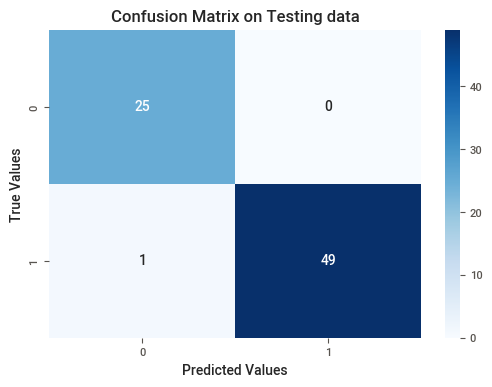

In [59]:
# calculation of confusion matrix on testing data
conf_matrix = confusion_matrix(y_test , test_ypred3)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Confusion Matrix on Testing data');


### 4. Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

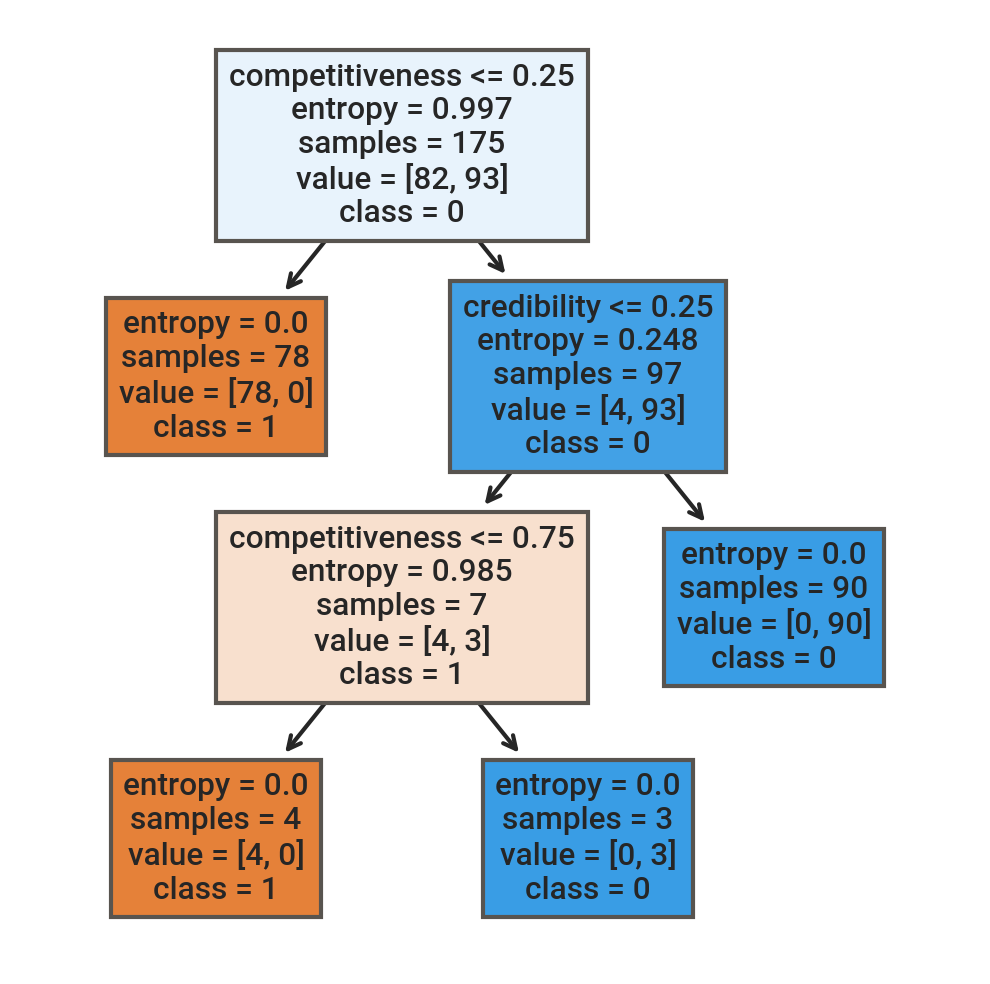

In [61]:
# Plotting Decision tree
from sklearn import tree
features = data1.columns
Classes = ['1','0']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(DT_model,
               feature_names = features, 
               class_names = Classes,
               filled = True);


#### Testing Decision Tree Classification on Train set

In [62]:
train_ypred4 = DT_model.predict(X_train)

# calculation of metrics
print("Training data Result:")
score4 =  accuracy_score(y_train , train_ypred4)
print("Accuracy: %0.4f",score4)
print('-'*70)
print("Precision: %0.4f", precision_score(y_train , train_ypred4))
print('-'*70)
print("Recall: %0.4f", recall_score(y_train , train_ypred4))
print('-'*70)
print("F1_score: %0.4f", f1_score(y_train , train_ypred4))
print('-'*70)
print("AUC : %0.4f" , roc_auc_score(y_train , train_ypred4))
print('-'*70)
print("Classification Report: \n",classification_report(y_train , train_ypred4))
print('-'*70)
print("confusion matrix:\n", confusion_matrix(y_train, train_ypred4))

Training data Result:
Accuracy: %0.4f 1.0
----------------------------------------------------------------------
Precision: %0.4f 1.0
----------------------------------------------------------------------
Recall: %0.4f 1.0
----------------------------------------------------------------------
F1_score: %0.4f 1.0
----------------------------------------------------------------------
AUC : %0.4f 1.0
----------------------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00        93

    accuracy                           1.00       175
   macro avg       1.00      1.00      1.00       175
weighted avg       1.00      1.00      1.00       175

----------------------------------------------------------------------
confusion matrix:
 [[82  0]
 [ 0 93]]


#### Testing Decision Tree Classification on the Testing set

In [63]:
test_ypred4 = DT_model.predict(X_test)

# calculation of metrics
print("Testing data Result:")
acc4 =  accuracy_score(y_test, test_ypred4)
print("Accuracy: %0.4f",acc4)
print('-'*70)
precision4 = precision_score(y_test, test_ypred4)
print("Precision: %0.4f", precision4)
print('-'*70)
recall4= recall_score(y_test, test_ypred4)
print("Recall: %0.4f", recall4)
print('-'*70)
f4 = f1_score(y_test, test_ypred4)
print("F1_score:v", f4)
print('-'*70)
print("AUC: %0.4f" , roc_auc_score(y_test, test_ypred4))
print('-'*70)
print("Classification Report: \n",classification_report(y_test , test_ypred4))
print('-'*70)
print("confusion matrix:\n", confusion_matrix(y_test, test_ypred4))

Testing data Result:
Accuracy: %0.4f 0.9866666666666667
----------------------------------------------------------------------
Precision: %0.4f 1.0
----------------------------------------------------------------------
Recall: %0.4f 0.98
----------------------------------------------------------------------
F1_score:v 0.98989898989899
----------------------------------------------------------------------
AUC: %0.4f 0.99
----------------------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.98      0.99        50

    accuracy                           0.99        75
   macro avg       0.98      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75

----------------------------------------------------------------------
confusion matrix:
 [[25  0]
 [ 1 49]]


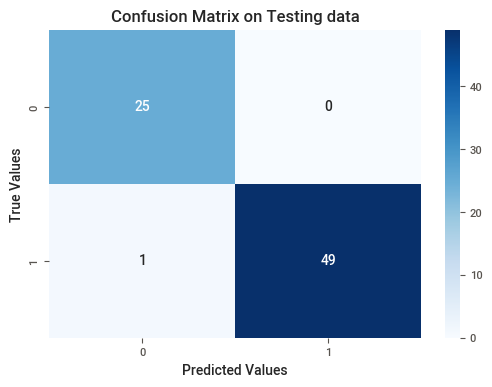

In [64]:
# calculation of confusion matrix on testing data
conf_matrix = confusion_matrix(y_test , test_ypred4)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Confusion Matrix on Testing data');


### 5. Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
RF_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

#### Testing the Random Forest Classification model on the Training set

In [66]:
train_ypred5 = RF_model.predict(X_train)

# calculation of metrics
print("Training data Result:")
score5 = accuracy_score(y_train , train_ypred5) 
print("Accuracy: %0.4f",score5)
print('-'*70)
print("Precision: %0.4f", precision_score(y_train , train_ypred5))
print('-'*70)
print("Recall: %0.4f", recall_score(y_train , train_ypred5))
print('-'*70)
print("F1_score: %0.4f", f1_score(y_train , train_ypred5))
print('-'*70)
print("AUC: %0.4f" , roc_auc_score(y_train , train_ypred5))
print('-'*70)
print("Classification Report: \n",classification_report(y_train , train_ypred5))
print('-'*70)
print("confusion matrix:\n", confusion_matrix(y_train, train_ypred5))

Training data Result:
Accuracy: %0.4f 1.0
----------------------------------------------------------------------
Precision: %0.4f 1.0
----------------------------------------------------------------------
Recall: %0.4f 1.0
----------------------------------------------------------------------
F1_score: %0.4f 1.0
----------------------------------------------------------------------
AUC: %0.4f 1.0
----------------------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00        93

    accuracy                           1.00       175
   macro avg       1.00      1.00      1.00       175
weighted avg       1.00      1.00      1.00       175

----------------------------------------------------------------------
confusion matrix:
 [[82  0]
 [ 0 93]]


#### Testing the Random Forest Classification model on the Testing set

In [67]:
test_ypred5 = RF_model.predict(X_test)

# calculation of metrics

print("Testing data Result:")
acc5 = accuracy_score(y_test, test_ypred5)
print("Accuracy: %0.4f", acc5)
print('-'*70)
precision5 = precision_score(y_test, test_ypred5)
print("Precision: %0.4f", precision5)
print('-'*70)
recall5 = recall_score(y_test, test_ypred5)
print("Recall: %0.4f", recall5)
print('-'*70)
f5 = f1_score(y_test, test_ypred5)
print("F1_score: %0.4f", f5)
print('-'*70)
print("AUC: %0.4f" , roc_auc_score(y_test, test_ypred5))
print('-'*70)
print("Classification Report: \n",classification_report(y_test , test_ypred5))


Testing data Result:
Accuracy: %0.4f 0.9866666666666667
----------------------------------------------------------------------
Precision: %0.4f 1.0
----------------------------------------------------------------------
Recall: %0.4f 0.98
----------------------------------------------------------------------
F1_score: %0.4f 0.98989898989899
----------------------------------------------------------------------
AUC: %0.4f 0.99
----------------------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.98      0.99        50

    accuracy                           0.99        75
   macro avg       0.98      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



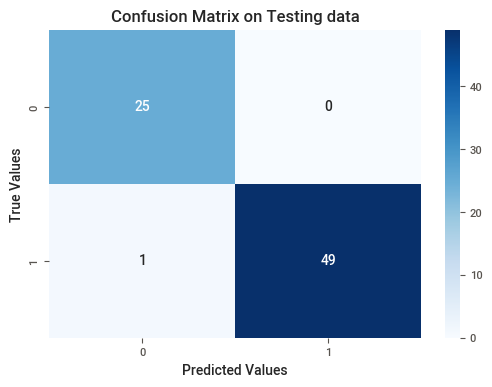

In [68]:
# calculation of confusion matrix on testing data
conf_matrix = confusion_matrix(y_test , test_ypred5)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Confusion Matrix on Testing data');


### 6. Support Vector Machines (SVM):

In [69]:
from sklearn.svm import SVC
SVM_model = SVC(kernel = 'linear', random_state = 42, probability=True)
SVM_model.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=42)

#### Testing the SVM on the Training set

In [70]:
train_ypred6 = SVM_model.predict(X_train)

# calculation of metrics
print("Training data Result:")
score6 = accuracy_score(y_train , train_ypred6) 
print("Accuracy: %0.4f", score6)
print('-'*70)
print("Precision: %0.4f", precision_score(y_train , train_ypred6))
print('-'*70)
print("Recall: %0.4f", recall_score(y_train , train_ypred6))
print('-'*70)
print("F1_score: %0.4f", f1_score(y_train , train_ypred6))
print('-'*70)
print("AUC: %0.4f" , roc_auc_score(y_train , train_ypred6))
print('-'*70)
print("Classification Report: \n",classification_report(y_train , train_ypred6))
print('-'*70)
print("confusion matrix:\n", confusion_matrix(y_train, train_ypred6))

Training data Result:
Accuracy: %0.4f 0.9942857142857143
----------------------------------------------------------------------
Precision: %0.4f 0.9893617021276596
----------------------------------------------------------------------
Recall: %0.4f 1.0
----------------------------------------------------------------------
F1_score: %0.4f 0.9946524064171123
----------------------------------------------------------------------
AUC: %0.4f 0.9939024390243902
----------------------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        82
           1       0.99      1.00      0.99        93

    accuracy                           0.99       175
   macro avg       0.99      0.99      0.99       175
weighted avg       0.99      0.99      0.99       175

----------------------------------------------------------------------
confusion matrix:
 [[81  1]
 [ 0 93]]


#### Testing the SVM model on the Testing set

In [71]:
test_ypred6 = SVM_model.predict(X_test)

# calculation of metrics
print("Testing data Result:")
acc6 = accuracy_score(y_test, test_ypred6)
print("Accuracy: %0.4f", acc6)
print('-'*70)
precision6 = precision_score(y_test, test_ypred6)
print("Precision: %0.4f", precision6)
print('-'*70)
recall6 = recall_score(y_test, test_ypred6)
print("Recall: %0.4f", recall6)
print('-'*70)
f6 = f1_score(y_test, test_ypred6)
print("F1_score: %0.4f", f6)
print('-'*70)
print("AUC: %0.4f" , roc_auc_score(y_test, test_ypred6))
print('-'*70)
print("Classification Report: \n",classification_report(y_test , test_ypred6))


Testing data Result:
Accuracy: %0.4f 0.9866666666666667
----------------------------------------------------------------------
Precision: %0.4f 1.0
----------------------------------------------------------------------
Recall: %0.4f 0.98
----------------------------------------------------------------------
F1_score: %0.4f 0.98989898989899
----------------------------------------------------------------------
AUC: %0.4f 0.99
----------------------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.98      0.99        50

    accuracy                           0.99        75
   macro avg       0.98      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



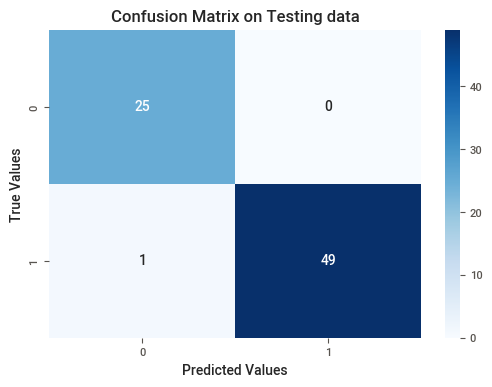

In [72]:
# calculation of confusion matrix on testing data
conf_matrix = confusion_matrix(y_test , test_ypred6)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Confusion Matrix on Testing data');


### 7. Extreme Gradient Boosting Classifier(XGBoost)

In [73]:
from xgboost import XGBClassifier
XGB_model = XGBClassifier(n_estimators=100,learning_rate=1.0)
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

#### Testing the XGBoost model on the Training set

In [74]:
train_ypred7 = XGB_model.predict(X_train)

# calculation of metrics
print("Training data Result:")
score7 = accuracy_score(y_train , train_ypred7) 
print("Accuracy: %0.4f",score7)
print('-'*70)
print("Precision: %0.4f", precision_score(y_train , train_ypred7))
print('-'*70)
print("Recall: %0.4f", recall_score(y_train , train_ypred7))
print('-'*70)
print("F1_score: %0.4f", f1_score(y_train , train_ypred7))
print('-'*70)
print("AUC: %0.4f" , roc_auc_score(y_train , train_ypred7))
print('-'*70)
print("Classification Report: \n",classification_report(y_train , train_ypred7))
print('-'*70)
print("confusion matrix:\n", confusion_matrix(y_train, train_ypred7))

Training data Result:
Accuracy: %0.4f 1.0
----------------------------------------------------------------------
Precision: %0.4f 1.0
----------------------------------------------------------------------
Recall: %0.4f 1.0
----------------------------------------------------------------------
F1_score: %0.4f 1.0
----------------------------------------------------------------------
AUC: %0.4f 1.0
----------------------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00        93

    accuracy                           1.00       175
   macro avg       1.00      1.00      1.00       175
weighted avg       1.00      1.00      1.00       175

----------------------------------------------------------------------
confusion matrix:
 [[82  0]
 [ 0 93]]


#### Testing the XGBoost model on the Testing set

In [75]:
test_ypred7 = XGB_model.predict(X_test)

# calculation of metrics

print("Testing data Result:")
acc7 = accuracy_score(y_test, test_ypred7)
print("Accuracy: %0.4f", acc7)
print('-'*70)
precision7 = precision_score(y_test, test_ypred7)
print("Precision: %0.4f", precision7)
print('-'*70)
recall7 = recall_score(y_test, test_ypred7)
print("Recall: %0.4f", recall7)
print('-'*70)
f7 = f1_score(y_test, test_ypred7)
print("F1_score: %0.4f", f7)
print('-'*70)
print("AUC: %0.4f" , roc_auc_score(y_test, test_ypred7))
print('-'*70)
print("Classification Report: \n",classification_report(y_test , test_ypred7))


Testing data Result:
Accuracy: %0.4f 0.9866666666666667
----------------------------------------------------------------------
Precision: %0.4f 1.0
----------------------------------------------------------------------
Recall: %0.4f 0.98
----------------------------------------------------------------------
F1_score: %0.4f 0.98989898989899
----------------------------------------------------------------------
AUC: %0.4f 0.99
----------------------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.98      0.99        50

    accuracy                           0.99        75
   macro avg       0.98      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



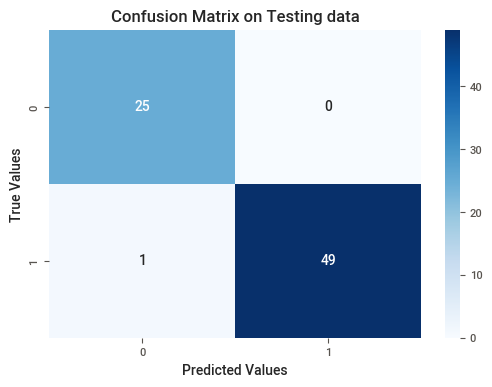

In [76]:
# calculation of confusion matrix on testing data
conf_matrix = confusion_matrix(y_test , test_ypred7)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Confusion Matrix on Testing data');


### 8. Artificial Neural Networks (ANN):

In [77]:
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [78]:
# Create model
ANN_model =keras.Sequential([
    keras.layers.Dense(units=64, activation='relu', input_dim=6),   # Update input_dim to match your number of features
    keras.layers.Dense(units=32, activation='relu'),
    keras.layers.Dense(units=1, activation='sigmoid')
]) 
# Compile model
ANN_model.compile(
    optimizer='adam',
    metrics=['accuracy'],
    loss='binary_crossentropy'
)

In [79]:
# Fit the model
ANN_model.fit(X_train, y_train, epochs=50, verbose=0)

In [80]:
# evaluate the model on training dataset
scores = ANN_model.evaluate(X_train, y_train)
score8 = scores[1]
print("%s: %.2f%%" % (ANN_model.metrics_names[1], scores[1]*100))

6/6 [==============================] - 0s 1ms/step - loss: 0.0078 - accuracy: 1.0000
accuracy: 100.00%


### Testing the ANN model on the Testing set

In [81]:
def predict(model,x):
    pred  = ANN_model.predict(x)
    pred[pred >= 0.5] = 1
    pred[pred < 0.5] = 0
    return pred

In [82]:
test_ypred8 = predict(ANN_model, X_test)

# calculation of metrics

print("Testing data Result:")
acc8 =  accuracy_score(y_test, test_ypred8)
print("Accuracy: %0.4f", acc8)
print('-'*70)
precision8 = precision_score(y_test, test_ypred8)
print("Precision: %0.4f", precision8)
print('-'*70)
recall8 = recall_score(y_test, test_ypred1)
print("Recall: %0.4f", recall8)
print('-'*70)
f8 = f1_score(y_test, test_ypred1)
print("F1_score: %0.4f", f8)
print('-'*70)
print("AUC: %0.4f" , roc_auc_score(y_test, test_ypred8))
print('-'*70)
print("Classification Report: \n",classification_report(y_test , test_ypred8))


3/3 [==============================] - 0s 2ms/step
Testing data Result:
Accuracy: %0.4f 1.0
----------------------------------------------------------------------
Precision: %0.4f 1.0
----------------------------------------------------------------------
Recall: %0.4f 1.0
----------------------------------------------------------------------
F1_score: %0.4f 1.0
----------------------------------------------------------------------
AUC: %0.4f 1.0
----------------------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        50

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



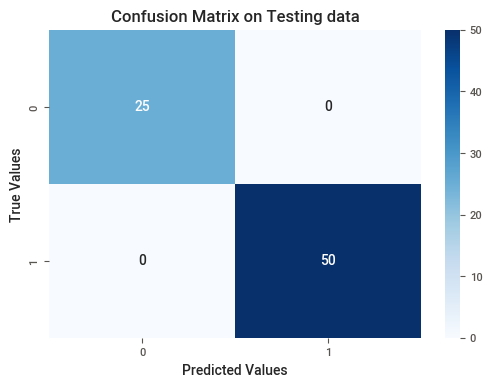

In [83]:
# calculation of confusion matrix on testing data
conf_matrix = confusion_matrix(y_test , test_ypred8)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Confusion Matrix on Testing data');


## Model Evaluation


Model evaluation is the process of assessing the performance of a machine learning model on a held-out dataset.

### Compare the accuracy of the models on the testing data set

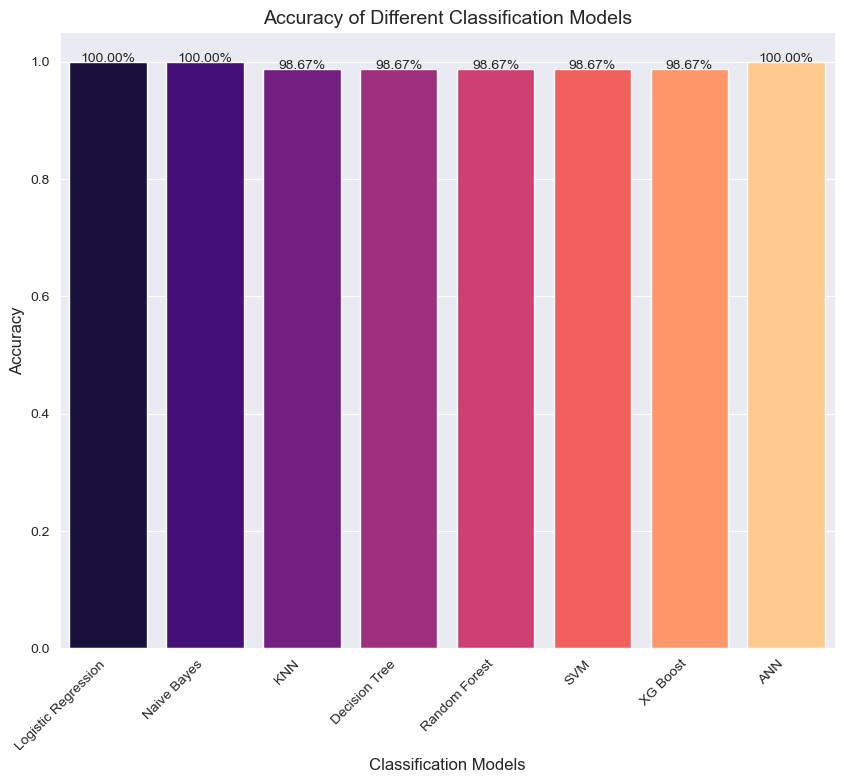

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Accuracy values and model names
accuracy = [acc1, acc2, acc3, acc4, acc5, acc6, acc7, acc8]
models = ["Logistic Regression", "Naive Bayes", "KNN", "Decision Tree", "Random Forest", "SVM", "XG Boost", "ANN"]

# Create the bar plot with y as accuracy and x as models
plt.figure(figsize=(10, 8))  # Adjust the figure size to accommodate vertical bars
sns.set_style("darkgrid")
ax = sns.barplot(x=models, y=accuracy, palette="magma", saturation=1.5)

# Customize the plot
plt.ylabel("Accuracy", fontsize=12)
plt.xlabel("Classification Models", fontsize=12)
plt.title("Accuracy of Different Classification Models", fontsize=14)
plt.xticks(rotation=45, fontsize=10, ha="right")  # Rotate x-axis labels for better visibility
plt.yticks(fontsize=10)

# Annotate the bars with accuracy values
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2%}', (p.get_x() + p.get_width() / 2, height), ha='center', fontsize='medium')

plt.show()


### ROC - Plotting Graph

3/3 [==============================] - 0s 0s/step


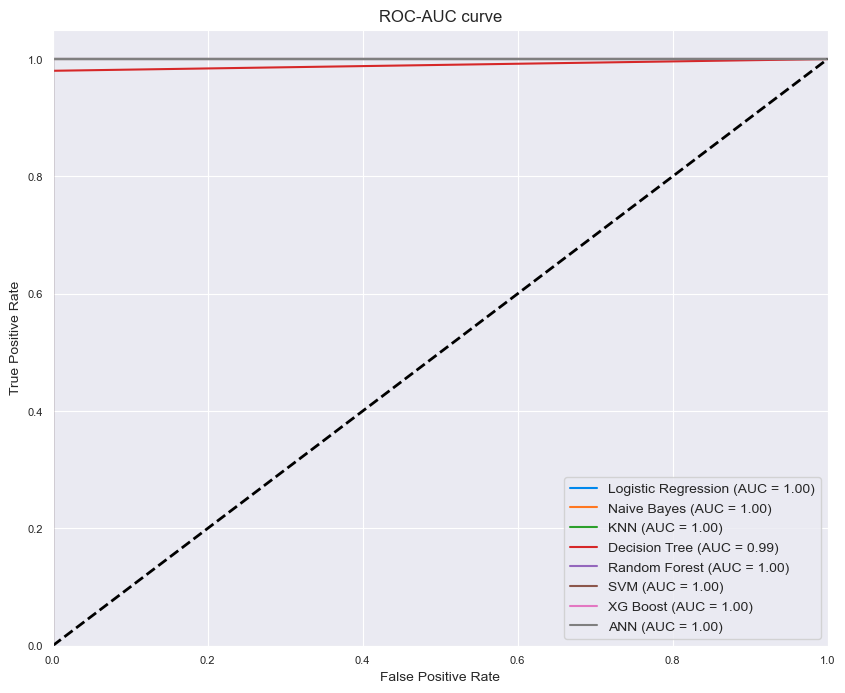

In [85]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

# Define your models
models = [
    ("Logistic Regression", LR_model),
    ("Naive Bayes", NB_model),
    ("KNN", KNN_model),
    ("Decision Tree", DT_model),
    ("Random Forest", RF_model),
    ("SVM", SVM_model),
    ("XG Boost", XGB_model),
    ("ANN", ANN_model)
]

# Create a figure to plot ROC-AUC curves
plt.figure(figsize=(10, 8))
plt.title('ROC-AUC curve')

# Loop through the models
for name, model in models:
    if "ANN" in name:  # For the Keras Sequential model
        y_pred = model.predict(X_test)
    else:
        y_pred = model.predict_proba(X_test)[:, 1]
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    auc_score = auc(fpr, tpr)
    
    # Plot ROC-AUC curve for each model
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


In [86]:
# Storing results in a data frame

results_dict  = {'Models':['Logistic Regression','Naive Bayes','KNN','Decision Tree','Random Forest',
                'SVM','XG Boost','ANN'], 
                 'Training Accuracy':[score1,score2,score3,score4,score5,score6,score7,score8],
                 'Testing Accuracy':[acc1, acc2, acc3, acc4, acc5, acc6, acc7, acc8],
                'F1_Score':[f1, f2, f3, f4, f5, f6, f7, f8],
                'Precision':[precision1, precision2, precision3, precision4, precision5,precision6,precision7,precision8],
                'Recall':[recall1, recall2, recall3, recall4, recall5, recall6, recall7, recall8]}

# Create a DataFrame
results_df = pd.DataFrame(results_dict )

# Sort the DataFrame by accuracy in descending order
results_df_sorted  = results_df.sort_values(by=['Testing Accuracy', 'Training Accuracy'], ascending=False)
results_df_sorted

,Models,Training Accuracy,Testing Accuracy,F1_Score,Precision,Recall
7,ANN,1.000,1.000,1.00,1.0,1.00
0,Logistic Regression,0.994,1.000,1.00,1.0,1.00
1,Naive Bayes,0.971,1.000,1.00,1.0,1.00
3,Decision Tree,1.000,0.987,0.99,1.0,0.98
4,Random Forest,1.000,0.987,0.99,1.0,0.98
6,XG Boost,1.000,0.987,0.99,1.0,0.98
2,KNN,0.994,0.987,0.99,1.0,0.98
5,SVM,0.994,0.987,0.99,1.0,0.98


## Model Deployement

## ML Pipelines

A machine learning (ML) pipeline is a sequence of steps that automates the process of building and deploying ML models.

In [87]:
# Create a pipeline that standardizes the data then creates a model
from sklearn.pipeline import Pipeline

# Load data 
data2 = data1.copy()

# Separate features (X) and target variable (Y)
X = data2.iloc[:, :6]  # Features
Y = data2.iloc[:, -1]  # Target variable

# Create a pipeline 
estimators = []
estimators.append(('standardize', StandardScaler())) # Standardize the features
estimators.append(('logistic', LogisticRegression()))  # Logistic Regression model
model = Pipeline(estimators)

# Evaluate the pipeline using k-fold cross-validation
kfold = KFold(n_splits=10)
results = cross_val_score(model, X, Y, cv=kfold)

# Print the mean accuracy and standard deviation of the model
mean_accuracy = results.mean()
std_accuracy = results.std()
print(f"Mean Accuracy: {mean_accuracy:.3f}")
print(f"Standard Deviation: {std_accuracy:.3f}")


Mean Accuracy: 0.996
Standard Deviation: 0.012


In [88]:
# Save Model Using Pickle and load and predict
import pickle
from pickle import dump
from pickle import load

# Load data 
data2 = data1.copy()

# Separate features (X) and target variable (Y)
X = data2.iloc[:, :6]  # Features
Y = data2.iloc[:, -1]  # Target variable

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
# Fit the model on 33%
model = LogisticRegression(max_iter=500)
model.fit(X_train, Y_train)

# Save the Logistic Regression model
filename = 'bankruptcy_prevention.sav'
dump(model, open('filename', 'wb'))
print(f"Model saved as {filename}")

# some time later...

# Load the saved model
loaded_logistic_model = pickle.load(open('bankruptcy_prevention.sav', 'rb'))

result = loaded_logistic_model.score(X_test, Y_test)
print(f"Model accuracy on the test data: {result:.2f}")

Model saved as bankruptcy_prevention.sav
Model accuracy on the test data: 1.00
